In [36]:
# Project name : Regression analysis using solar power dataset

# Project timeline : 19th August, 2024 to 20th September, 2024

# Objective : The variable to be predicted is continuous (energy production). Therefore, this is an Regression project.
# The primary goal is to model energy production as a function of environmental variables

In [37]:
# Data Set Description

# The file solarpowergeneration.csv contains the data for this example.
# Here, the number of variables (columns) is 10, and the number of instances (rows) is 2920.
# We have the following variables for this analysis:
# •	distance_to_solar_noon, in radians.
# •	temperature, daily average temperature, in degrees Celsius.
# •	wind_direction, daily average wind direction, in degrees (0-360).
# •	wind_speed, daily average wind speed, in meters per second.
# •	sky_cover, on a five-step scale from 0 to 4, with 0 completely clear and 4 wholly covered.
# •	visibility, in kilometers.
# •	humidity, in percentage.
# •	average_wind_speed, average wind speed during the 3 hours de measure was taken in meters per second.
# •	average_pressure, average barometric pressure during the 3 hours the measure was taken in, in mercury inches.
# •	power_generated(Target), in Jules for each 3 hours

In [38]:
# Import the necessary libraries and loading the data set

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("/content/solarpowergeneration.csv")
df



distance-to-solar-noon  temperature  wind-direction  wind-speed  \
0                   0.859897           69              28         7.5   
1                   0.628535           69              28         7.5   
2                   0.397172           69              28         7.5   
3                   0.165810           69              28         7.5   
4                   0.065553           69              28         7.5   
...                      ...          ...             ...         ...   
2915                0.166453           63              27        13.9   
2916                0.064020           63              27        13.9   
2917                0.294494           63              27        13.9   
2918                0.524968           63              27        13.9   
2919                0.755442           63              27        13.9   

      sky-cover  visibility  humidity  average-wind-speed-(period)  \
0             0        10.0        75                          8.0   
1             0        10.0        77                          5.0   
2             0        10.0        70                          0.0   
3             0        10.0        33                          0.0   
4             0        10.0        21                          3.0   
...         ...         ...       ...                          ...   
2915          4        10.0        75                         10.0   
2916          1        10.0        66                         15.0   
2917          2        10.0        68                         21.0   
2918          2        10.0        81                         17.0   
2919          1        10.0        81                         11.0   

      average-pressure-(period)  power-generated  
0                         29.82                0  
1                         29.85                0  
2                         29.89             5418  
3                         29.91            25477  
4                         29.89            30069  
...                         ...              ...  
2915                      29.93             6995  
2916                      29.91            29490  
2917                      29.88            17257  
2918                      29.87              677  
2919                      29.90                0  

[2920 rows x 10 columns]

In [39]:

# Exploratory data analysis

# Understanding the variables and their datatypes

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.2 KB


In [40]:

# Top 5 records

df.head()

distance-to-solar-noon  temperature  wind-direction  wind-speed  sky-cover  \
0                0.859897           69              28         7.5          0   
1                0.628535           69              28         7.5          0   
2                0.397172           69              28         7.5          0   
3                0.165810           69              28         7.5          0   
4                0.065553           69              28         7.5          0   

   visibility  humidity  average-wind-speed-(period)  \
0        10.0        75                          8.0   
1        10.0        77                          5.0   
2        10.0        70                          0.0   
3        10.0        33                          0.0   
4        10.0        21                          3.0   

   average-pressure-(period)  power-generated  
0                      29.82                0  
1                      29.85                0  
2                      29.89             5418  
3                      29.91            25477  
4                      29.89            30069

In [41]:

# Bottom 5 records

df.tail()

distance-to-solar-noon  temperature  wind-direction  wind-speed  \
2915                0.166453           63              27        13.9   
2916                0.064020           63              27        13.9   
2917                0.294494           63              27        13.9   
2918                0.524968           63              27        13.9   
2919                0.755442           63              27        13.9   

      sky-cover  visibility  humidity  average-wind-speed-(period)  \
2915          4        10.0        75                         10.0   
2916          1        10.0        66                         15.0   
2917          2        10.0        68                         21.0   
2918          2        10.0        81                         17.0   
2919          1        10.0        81                         11.0   

      average-pressure-(period)  power-generated  
2915                      29.93             6995  
2916                      29.91            29490  
2917                      29.88            17257  
2918                      29.87              677  
2919                      29.90                0

In [42]:

# Analyzing variable statistics

df.describe()

distance-to-solar-noon  temperature  wind-direction   wind-speed  \
count             2920.000000  2920.000000     2920.000000  2920.000000   
mean                 0.503294    58.468493       24.953425    10.096986   
std                  0.298024     6.841200        6.915178     4.838185   
min                  0.050401    42.000000        1.000000     1.100000   
25%                  0.243714    53.000000       25.000000     6.600000   
50%                  0.478957    59.000000       27.000000    10.000000   
75%                  0.739528    63.000000       29.000000    13.100000   
max                  1.141361    78.000000       36.000000    26.600000   

         sky-cover   visibility     humidity  average-wind-speed-(period)  \
count  2920.000000  2920.000000  2920.000000                  2919.000000   
mean      1.987671     9.557705    73.513699                    10.129154   
std       1.411978     1.383884    15.077139                     7.261547   
min       0.000000     0.000000    14.000000                     0.000000   
25%       1.000000    10.000000    65.000000                     5.000000   
50%       2.000000    10.000000    77.000000                     9.000000   
75%       3.000000    10.000000    84.000000                    15.000000   
max       4.000000    10.000000   100.000000                    40.000000   

       average-pressure-(period)  power-generated  
count                2920.000000      2920.000000  
mean                   30.017760      6979.846233  
std                     0.142006     10312.336413  
min                    29.480000         0.000000  
25%                    29.920000         0.000000  
50%                    30.000000       404.000000  
75%                    30.110000     12723.500000  
max                    30.530000     36580.000000

In [43]:
# Checking for null values

df.isnull()

distance-to-solar-noon  temperature  wind-direction  wind-speed  \
0                      False        False           False       False   
1                      False        False           False       False   
2                      False        False           False       False   
3                      False        False           False       False   
4                      False        False           False       False   
...                      ...          ...             ...         ...   
2915                   False        False           False       False   
2916                   False        False           False       False   
2917                   False        False           False       False   
2918                   False        False           False       False   
2919                   False        False           False       False   

      sky-cover  visibility  humidity  average-wind-speed-(period)  \
0         False       False     False                        False   
1         False       False     False                        False   
2         False       False     False                        False   
3         False       False     False                        False   
4         False       False     False                        False   
...         ...         ...       ...                          ...   
2915      False       False     False                        False   
2916      False       False     False                        False   
2917      False       False     False                        False   
2918      False       False     False                        False   
2919      False       False     False                        False   

      average-pressure-(period)  power-generated  
0                         False            False  
1                         False            False  
2                         False            False  
3                         False            False  
4                         False            False  
...                         ...              ...  
2915                      False            False  
2916                      False            False  
2917                      False            False  
2918                      False            False  
2919                      False            False  

[2920 rows x 10 columns]

In [44]:
df.isnull().sum()

# average-wind-speed-(period) is null for one record

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64

In [45]:

# Filling null value with data

# We will take the mean of the average-wind-speed-(period) and fill up the null value
df = df.fillna(df['average-wind-speed-(period)'].median())

In [46]:

df.isnull().sum()

# No null values now

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
power-generated                0
dtype: int64

In [47]:
# Identifying categorical variables

df_categorical_features = df.select_dtypes(include='category')
df_categorical_features

# There are no categorical variables in the dataset so might not need one hot encoding or label encoding

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[2920 rows x 0 columns]

In [48]:
# Identify numerical columns in the dataset.

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_columns)

Index(['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
       'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)',
       'average-pressure-(period)', 'power-generated'],
      dtype='object')


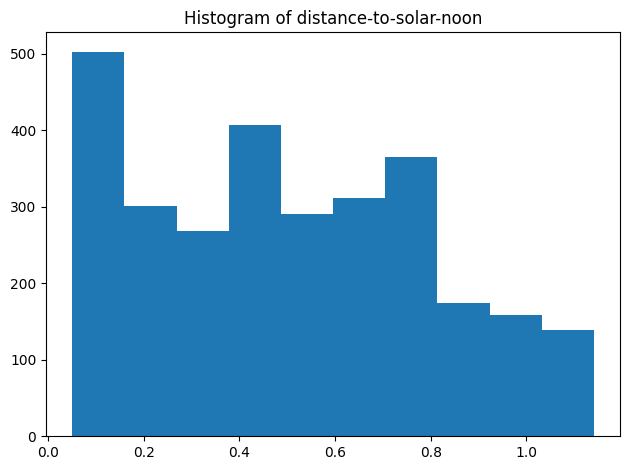

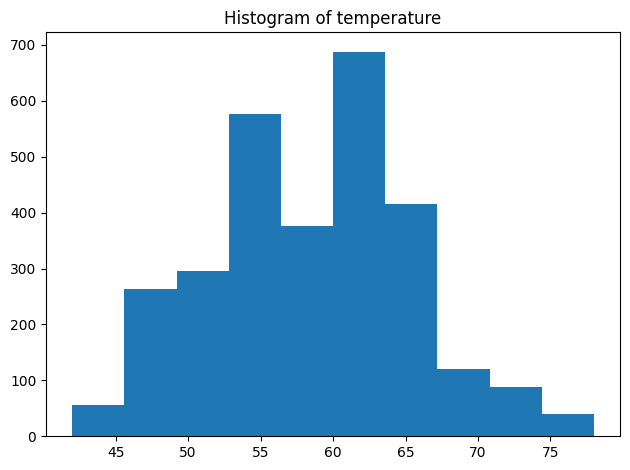

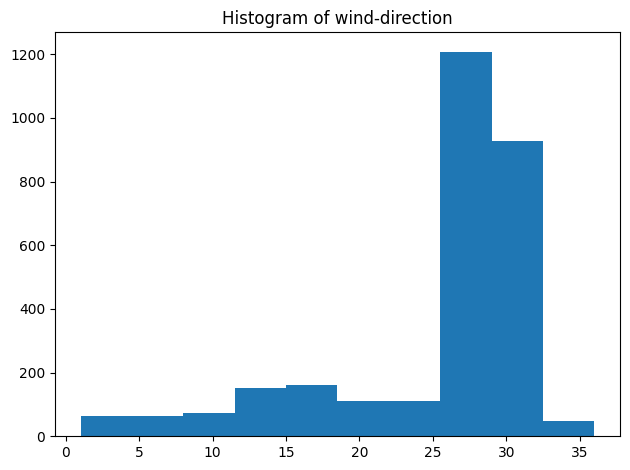

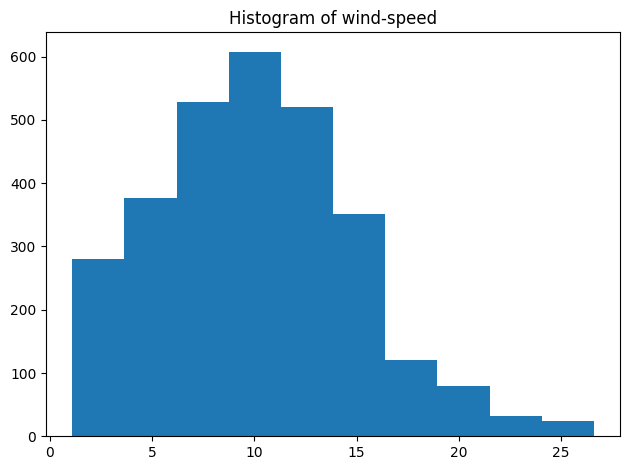

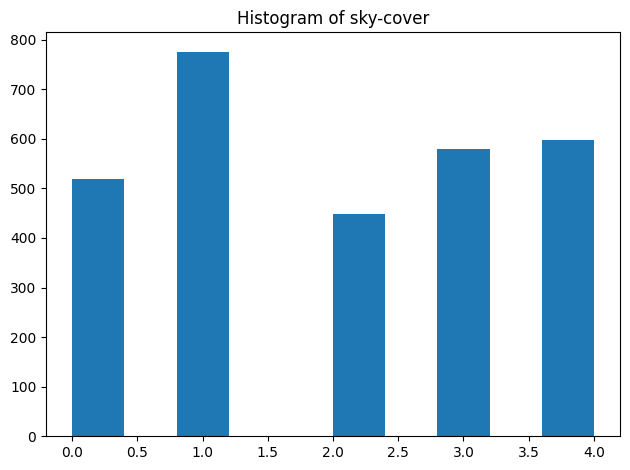

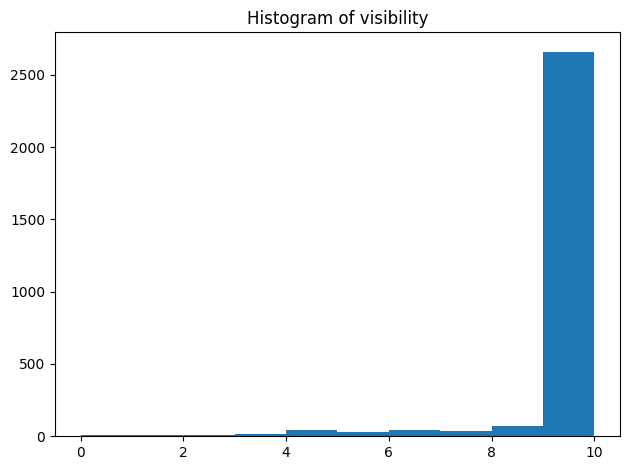

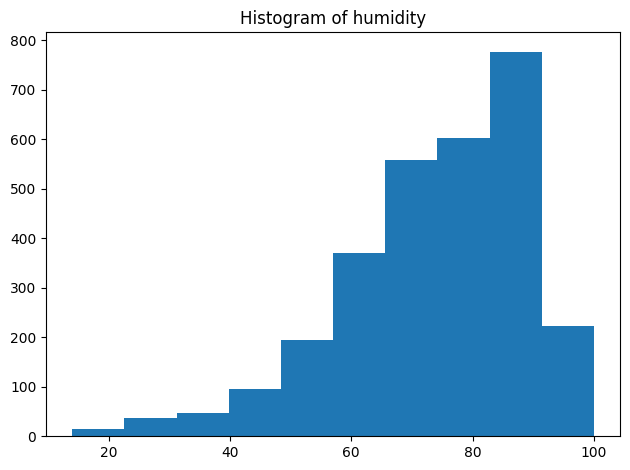

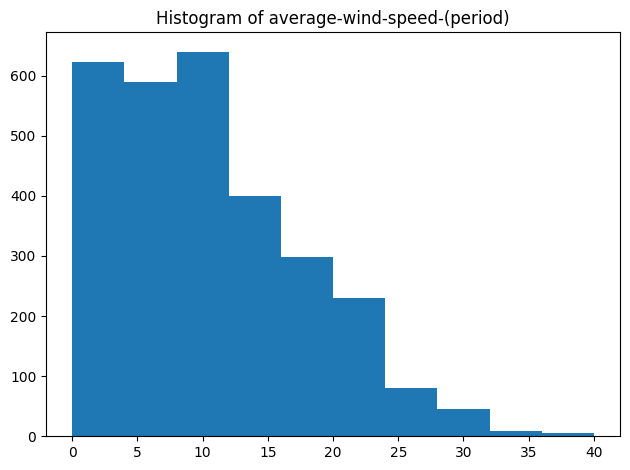

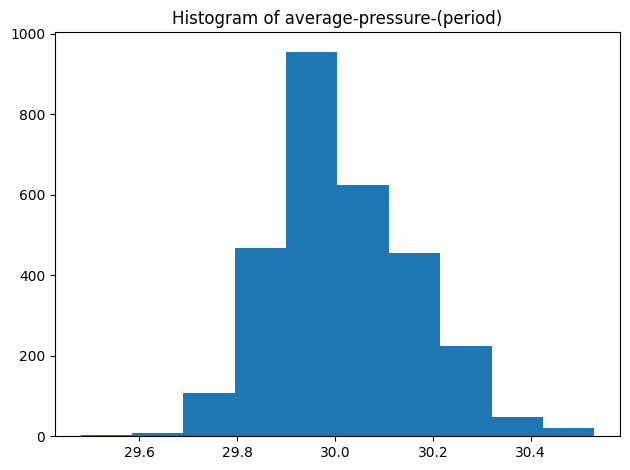

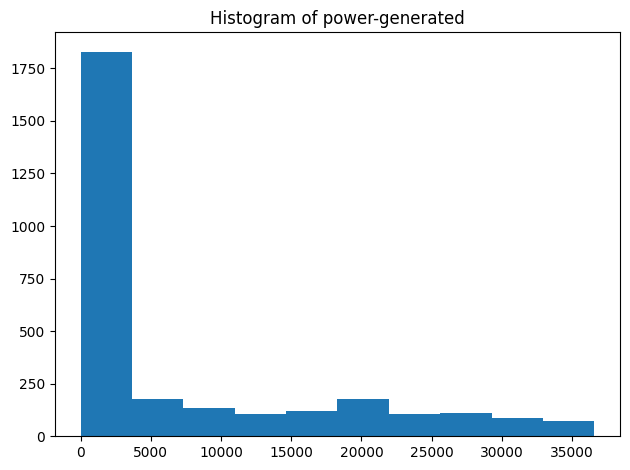

In [49]:
#Plotting histograms for each numerical column.

# Plot histograms for each numerical column
for column in numerical_columns:
    plt.hist(df[column])
    plt.title(f"Histogram of {column}")
    plt.tight_layout()
    plt.show()

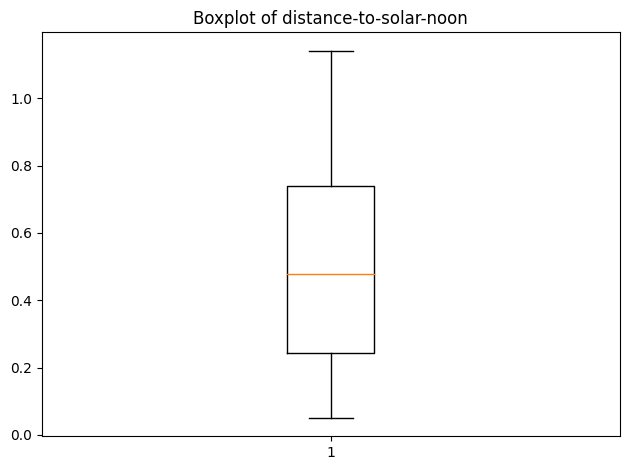

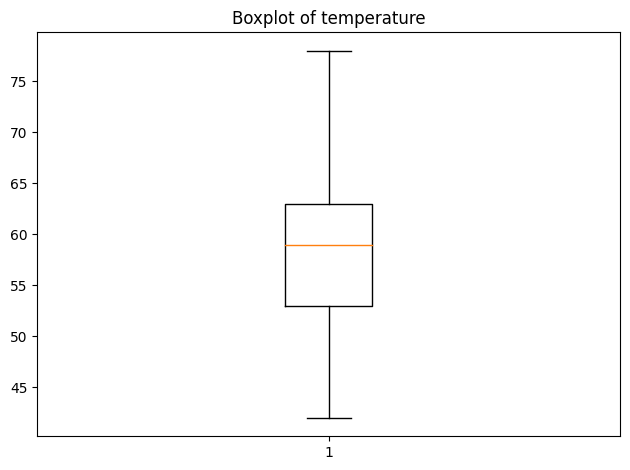

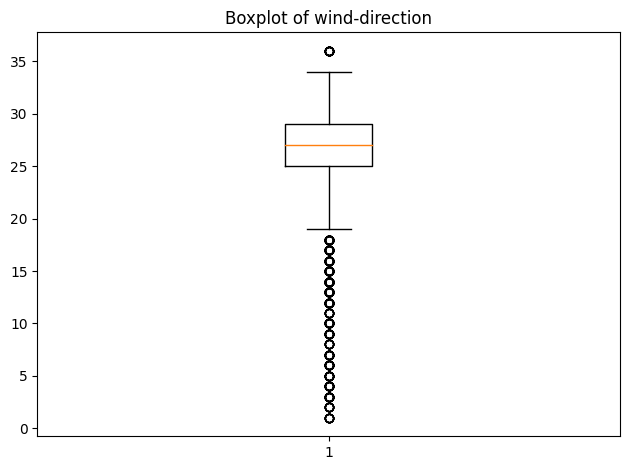

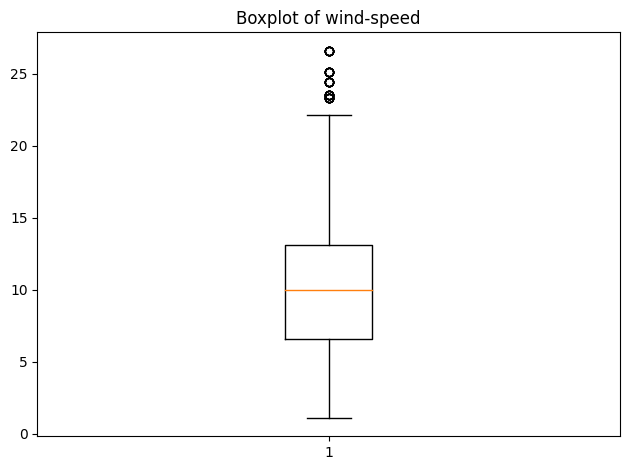

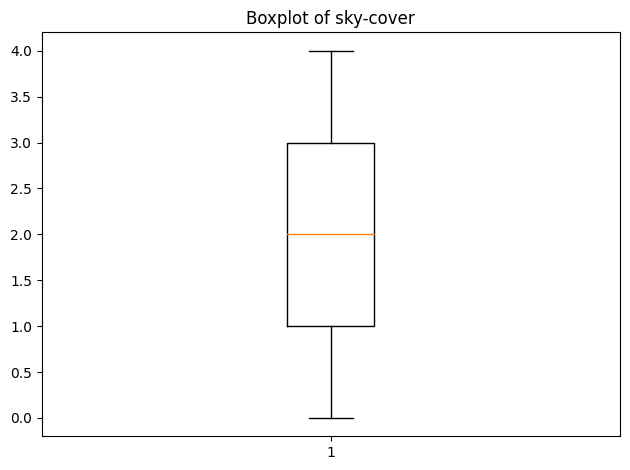

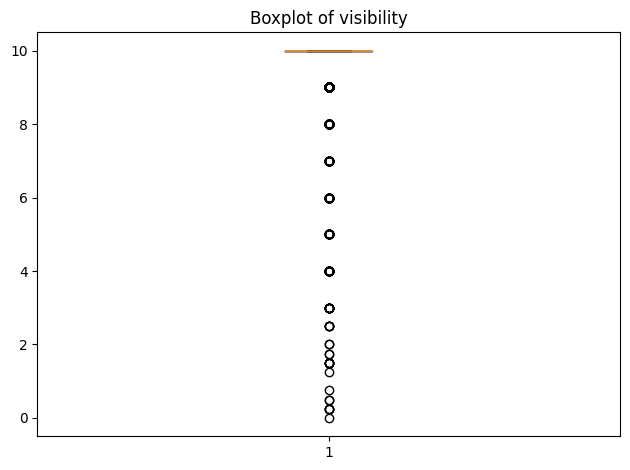

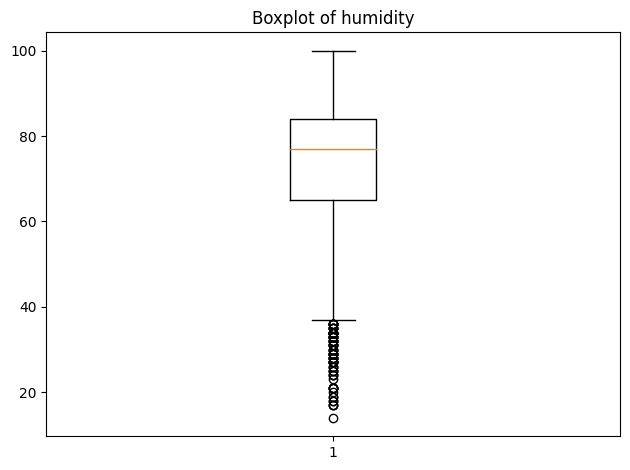

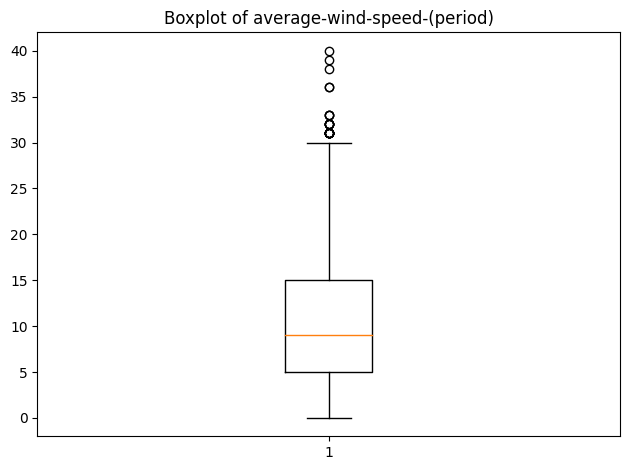

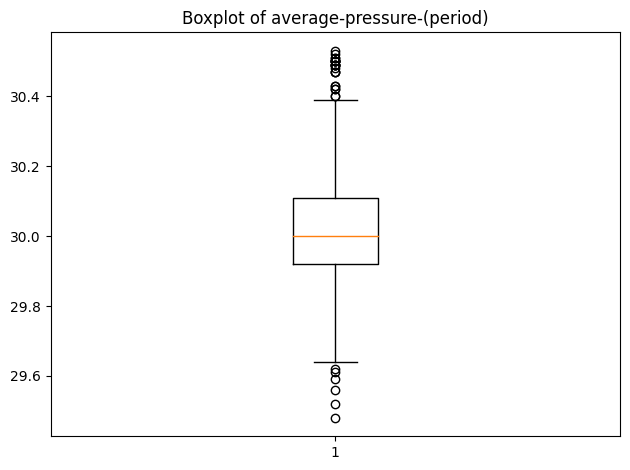

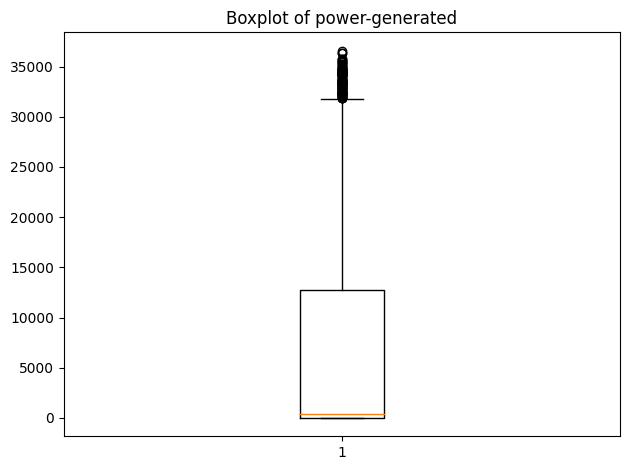

In [50]:
# Create boxplots for numerical variables

for column in numerical_columns:
    plt.boxplot(df[column])
    plt.title(f"Boxplot of {column}")
    plt.tight_layout()
    plt.show()

In [51]:
# Calculate skewness for numerical columns
skewness = df.skew()

print('Skewness for numerical_columns:')
print(skewness)

Skewness for numerical_columns:
distance-to-solar-noon         0.211452
temperature                    0.125916
wind-direction                -1.629519
wind-speed                     0.416851
sky-cover                      0.080284
visibility                    -3.862446
humidity                      -0.955607
average-wind-speed-(period)    0.623168
average-pressure-(period)      0.441384
power-generated                1.307035
dtype: float64


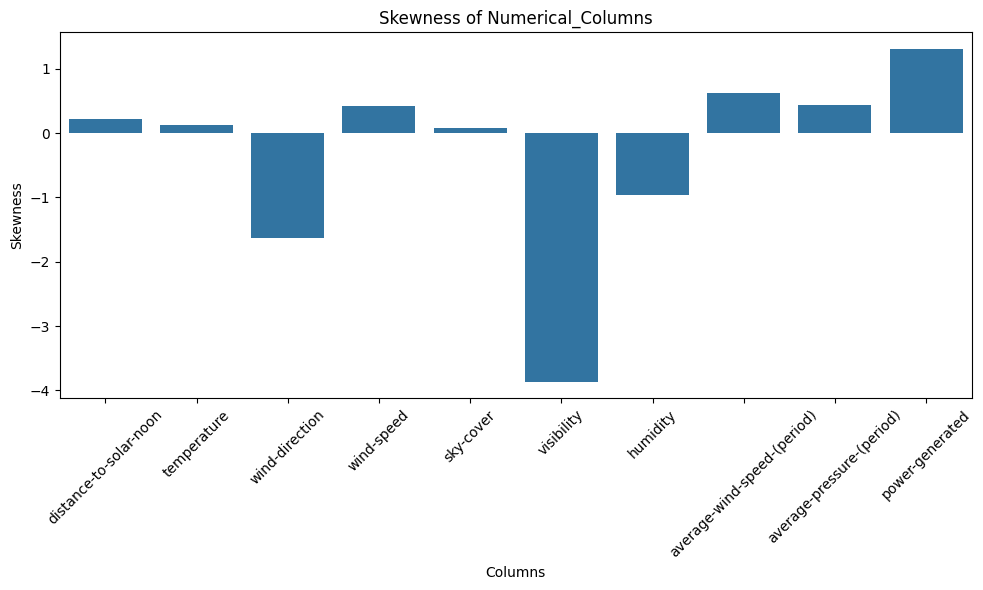

In [52]:
# Plotting the skewness of numerical columns
plt.figure(figsize=(10, 6))
sns.barplot(x=skewness.index, y=skewness.values)
plt.title('Skewness of Numerical_Columns')
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Kurtosis for numerical_columns:
distance-to-solar-noon         -0.987306
temperature                    -0.287402
wind-direction                  1.856622
wind-speed                      0.078606
sky-cover                      -1.341456
visibility                     15.718494
humidity                        0.872219
average-wind-speed-(period)     0.016458
average-pressure-(period)       0.352309
power-generated                 0.342206
dtype: float64


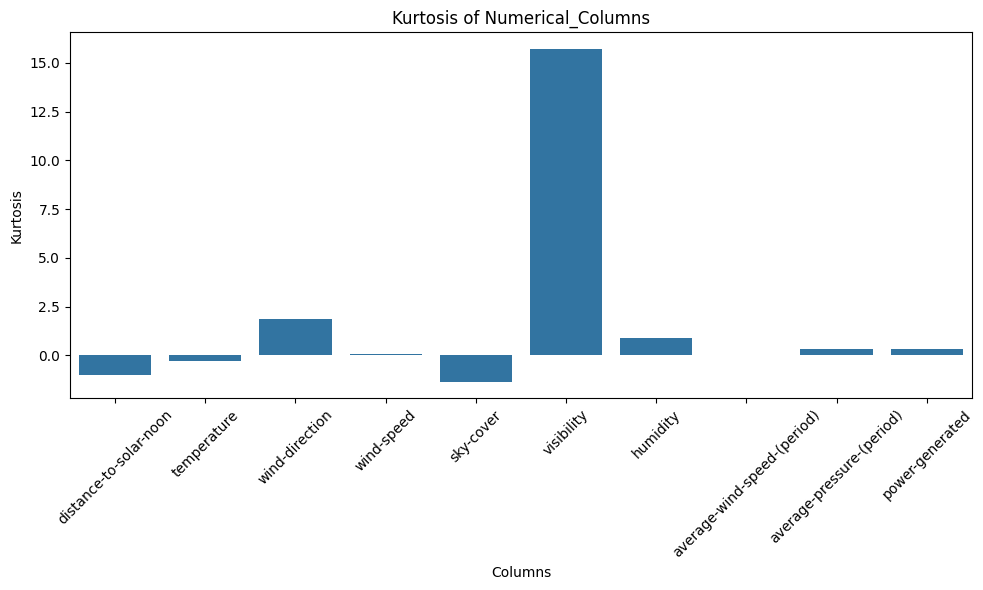

In [53]:
# Calculate kurtosis for numerical columns
kurtosis = df.kurtosis()

print('Kurtosis for numerical_columns:')
print(kurtosis)

# Plotting the kurtosis of numerical columns
plt.figure(figsize=(10, 6))
sns.barplot(x=kurtosis.index, y=kurtosis.values)
plt.title('Kurtosis of Numerical_Columns')
plt.xlabel('Columns')
plt.ylabel('Kurtosis')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

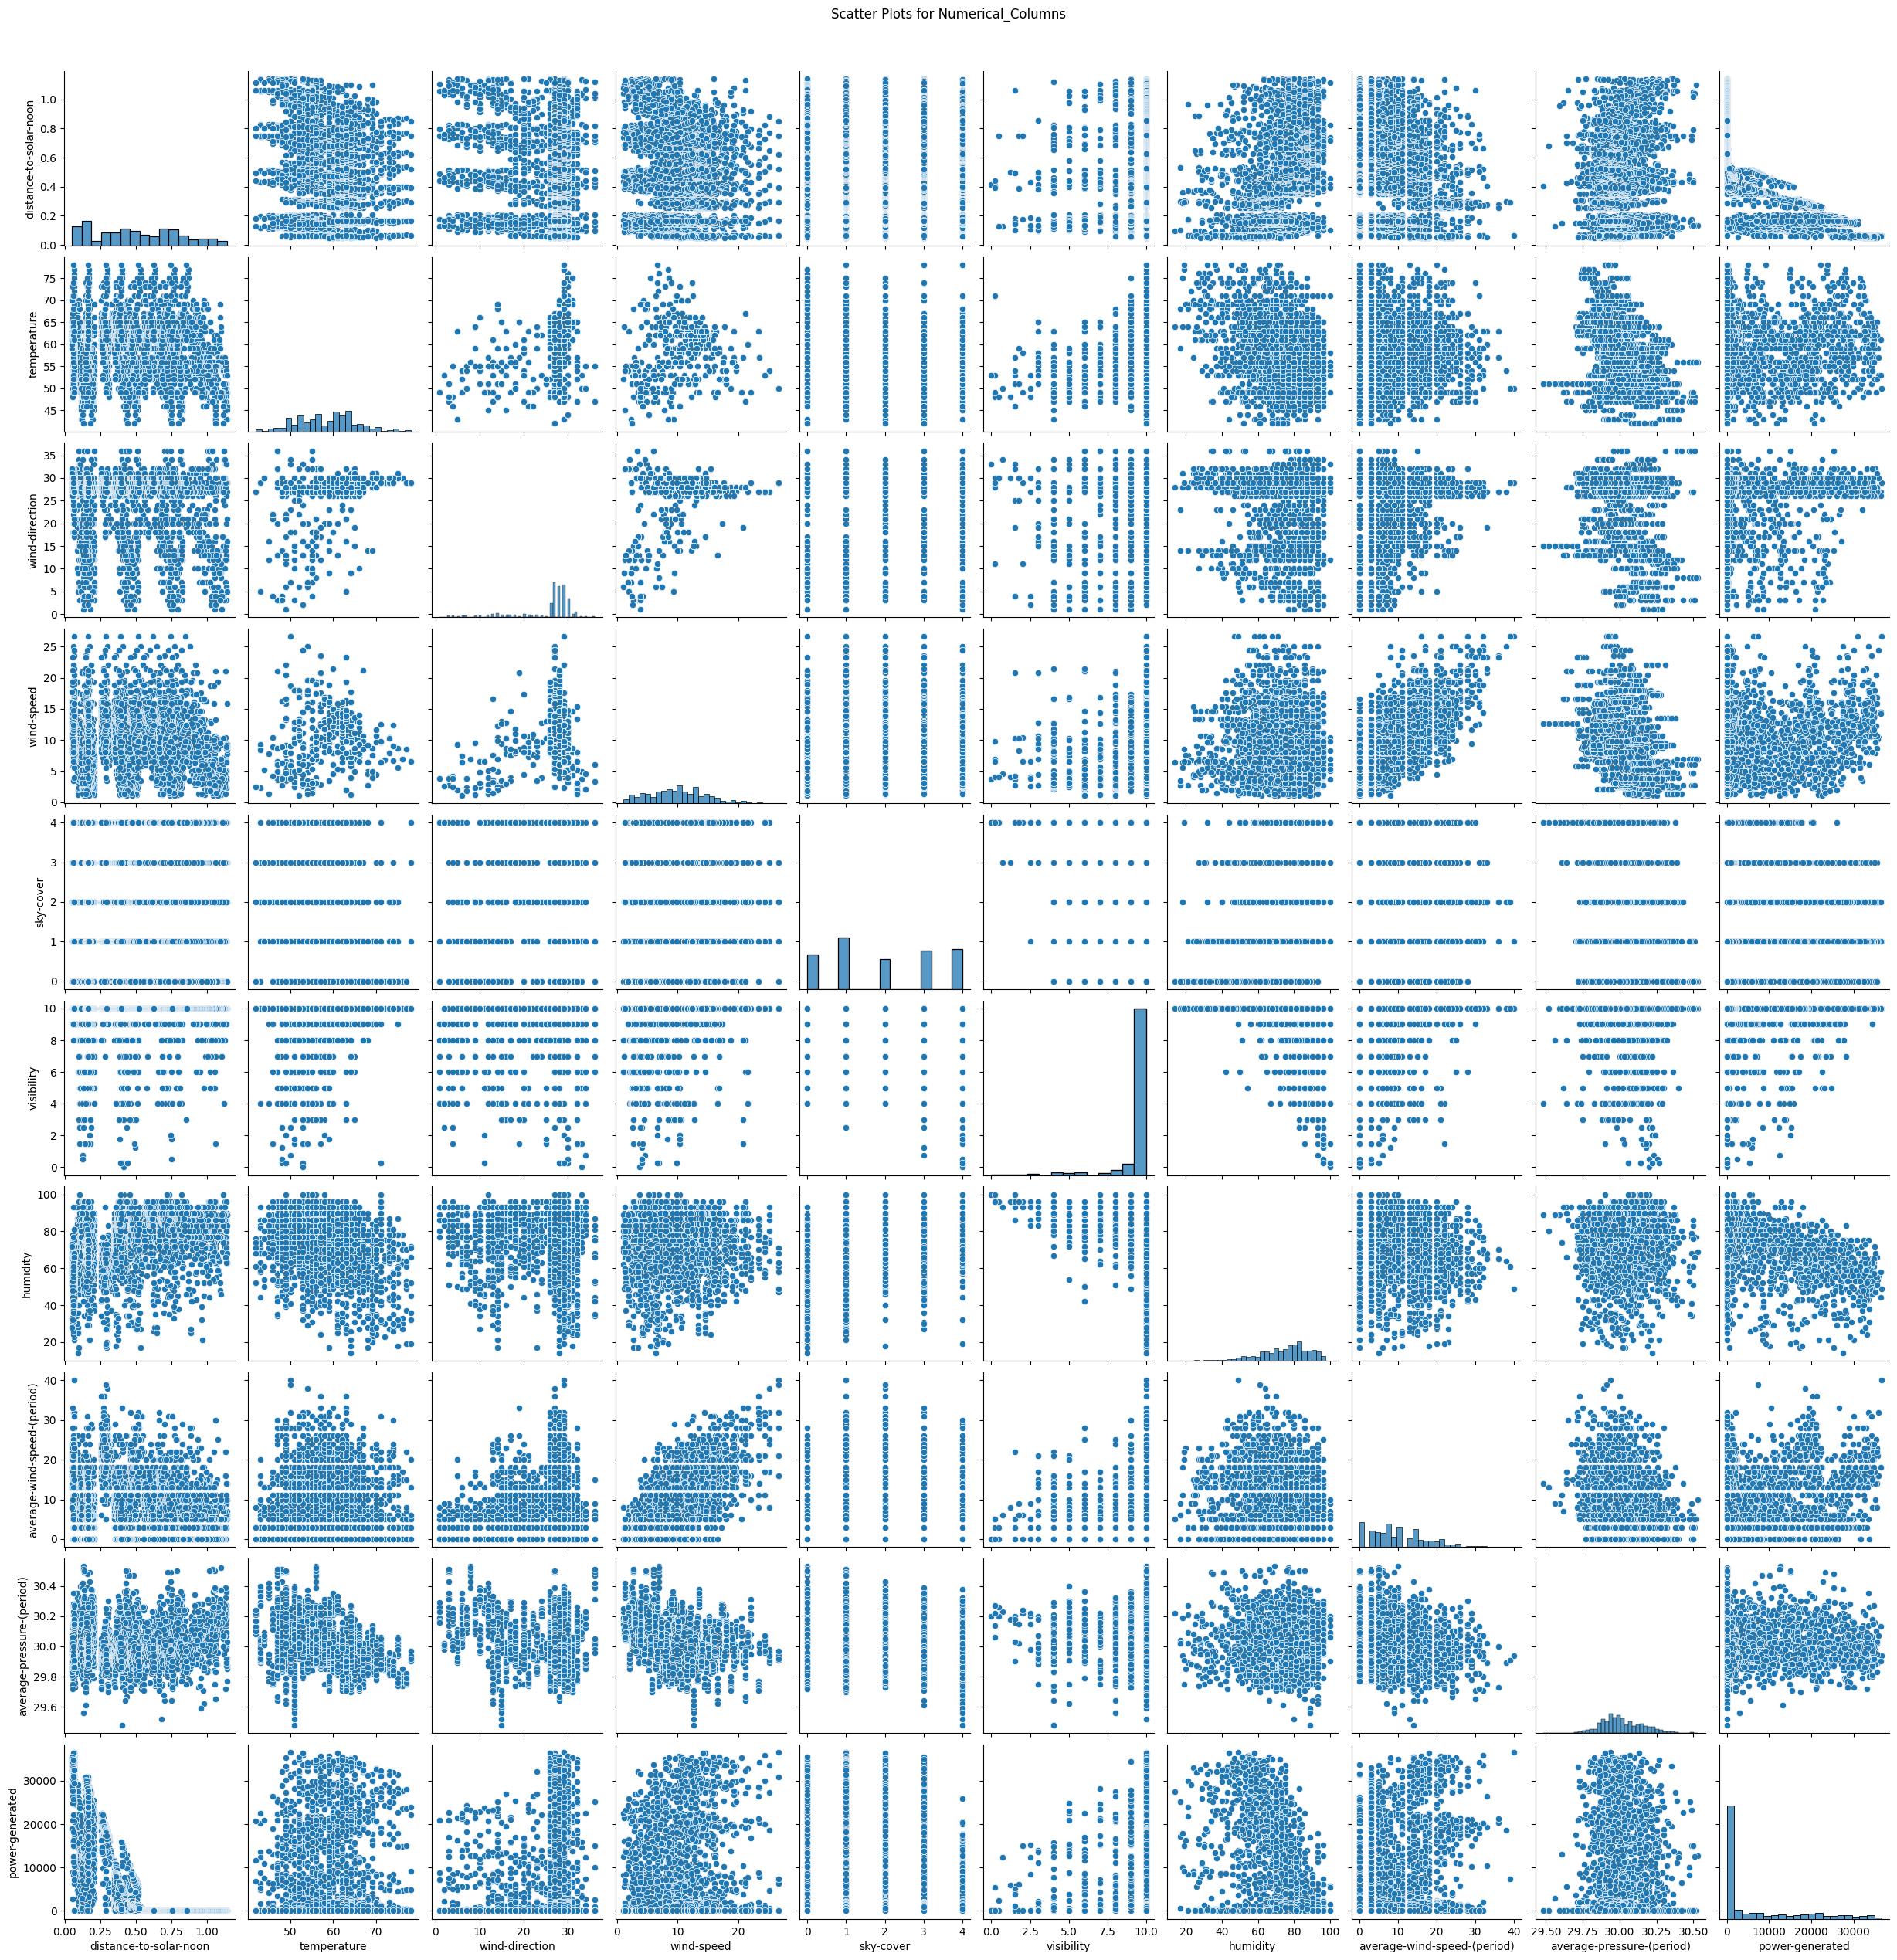

In [54]:

sns.pairplot(df)
plt.suptitle('Scatter Plots for Numerical_Columns', y=1.02)
plt.show()

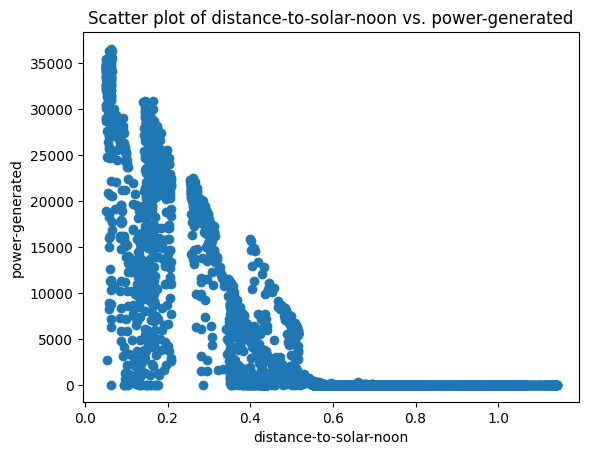

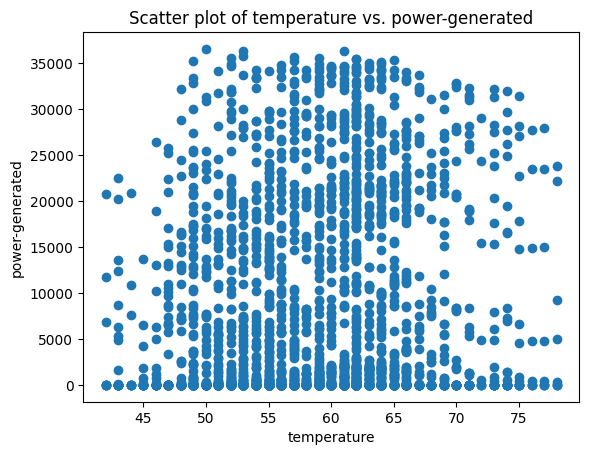

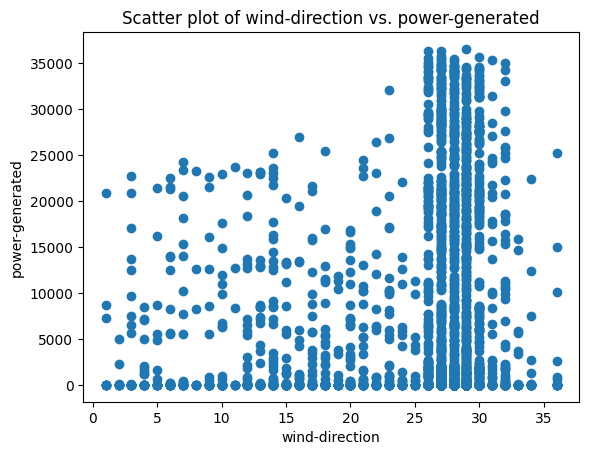

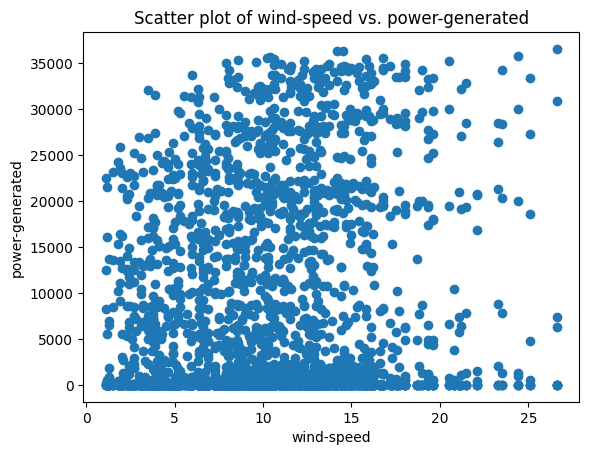

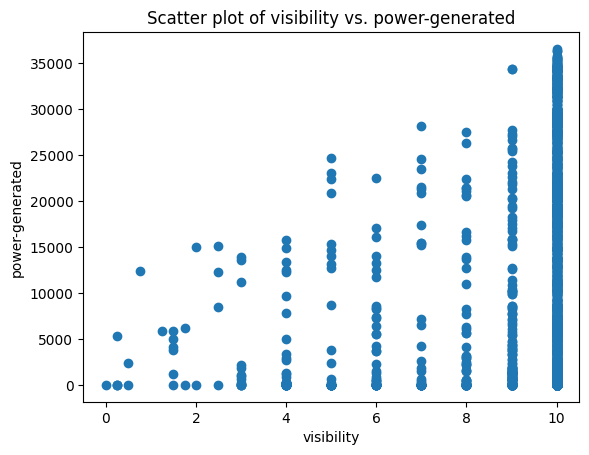

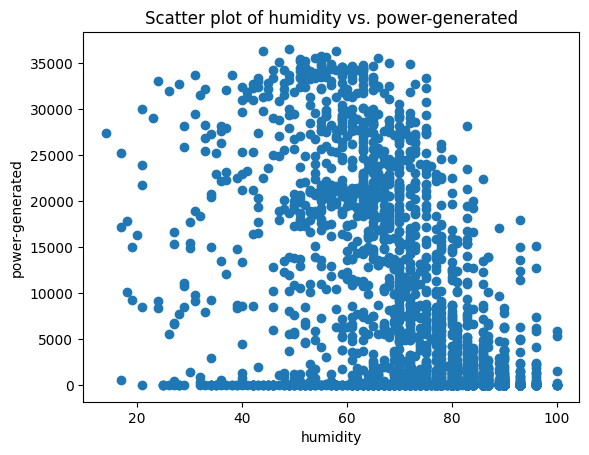

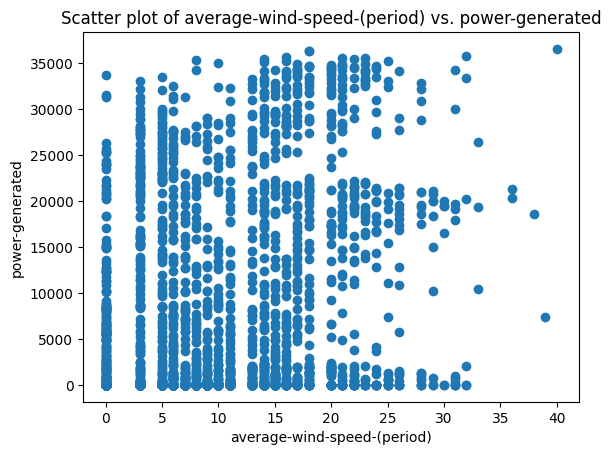

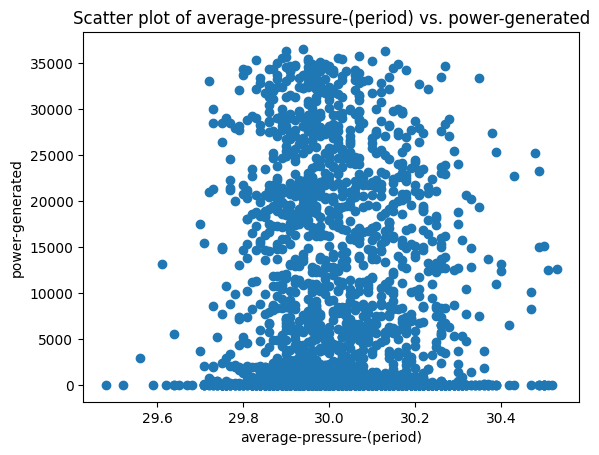

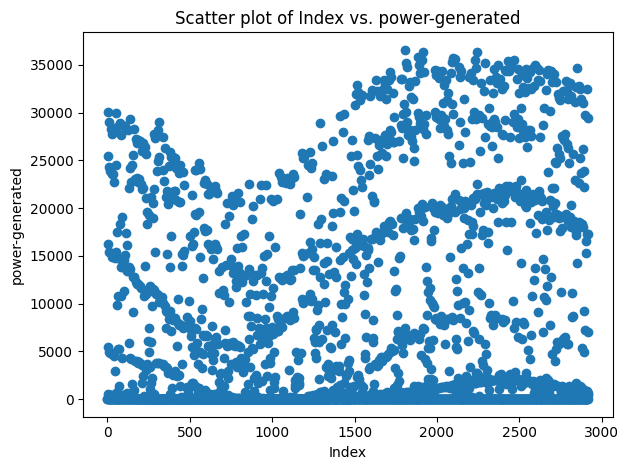

In [55]:
for Numerical_Columns in ['distance-to-solar-noon','temperature', 'wind-direction', 'wind-speed',
             'visibility', 'humidity', 'average-wind-speed-(period)',
            'average-pressure-(period)']:
    plt.figure()
    plt.scatter(df[Numerical_Columns], df['power-generated'])
    plt.xlabel(Numerical_Columns)
    plt.ylabel('power-generated')
    plt.title(f'Scatter plot of {Numerical_Columns} vs. power-generated')
    plt.show()

plt.figure()
plt.scatter(df.index, df['power-generated'])
plt.xlabel('Index')
plt.ylabel('power-generated')
plt.title('Scatter plot of Index vs. power-generated')
plt.tight_layout()
plt.show()


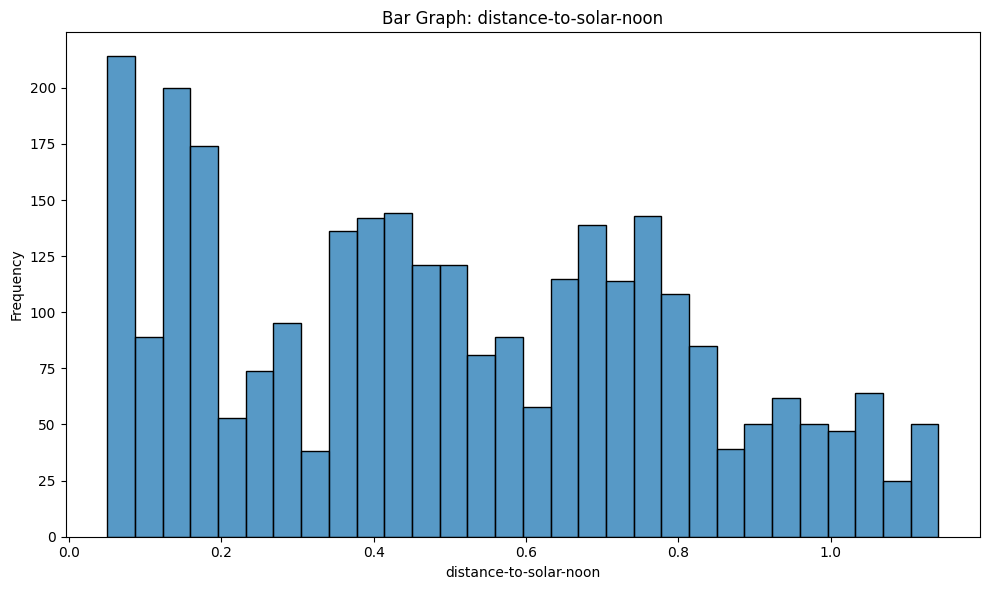

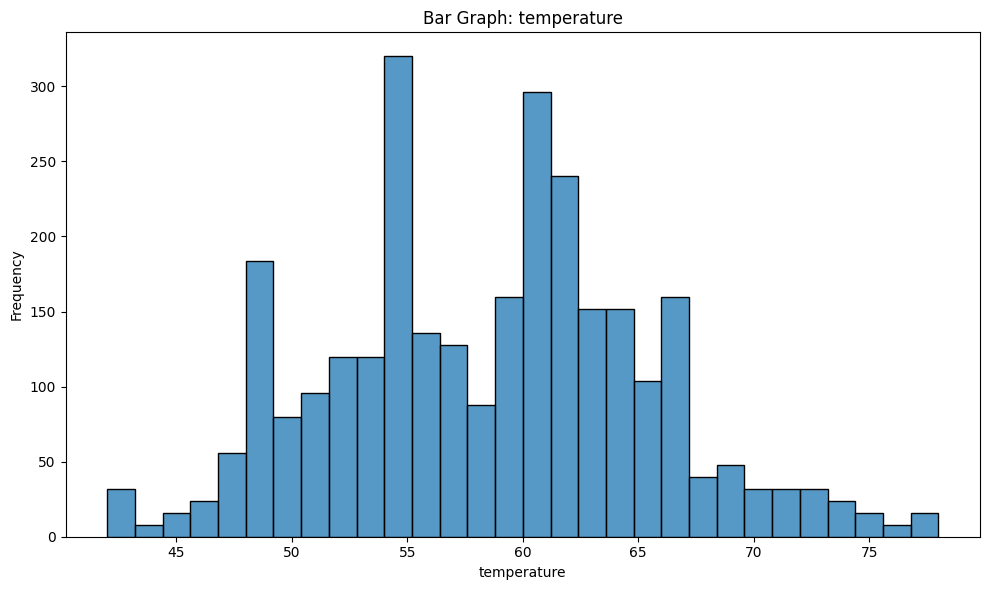

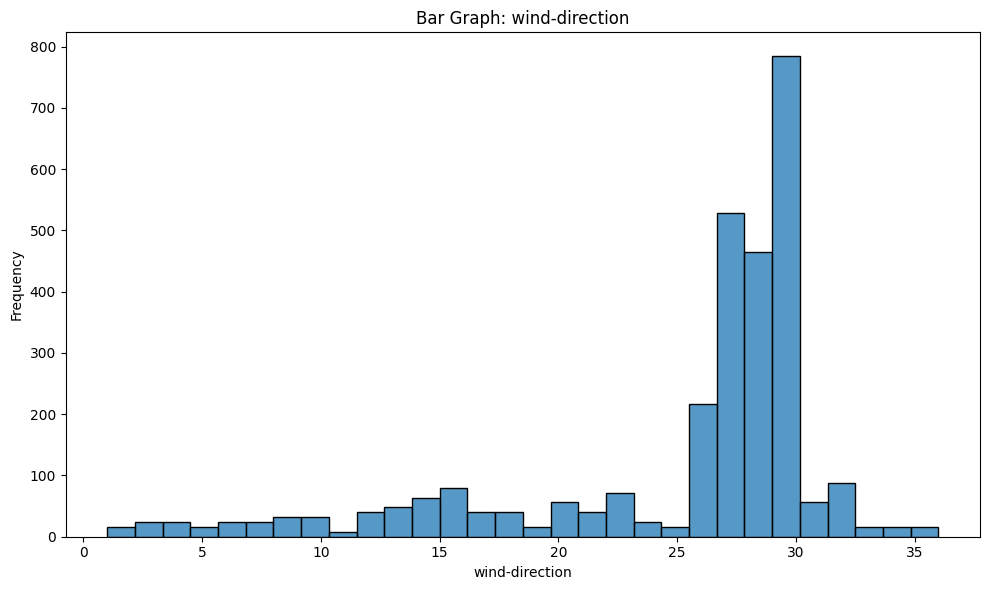

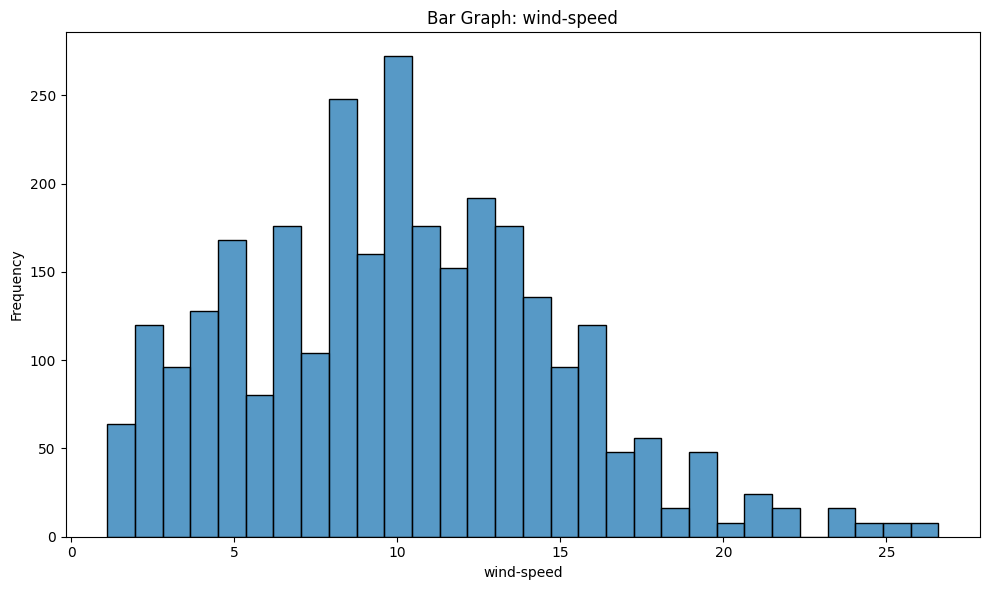

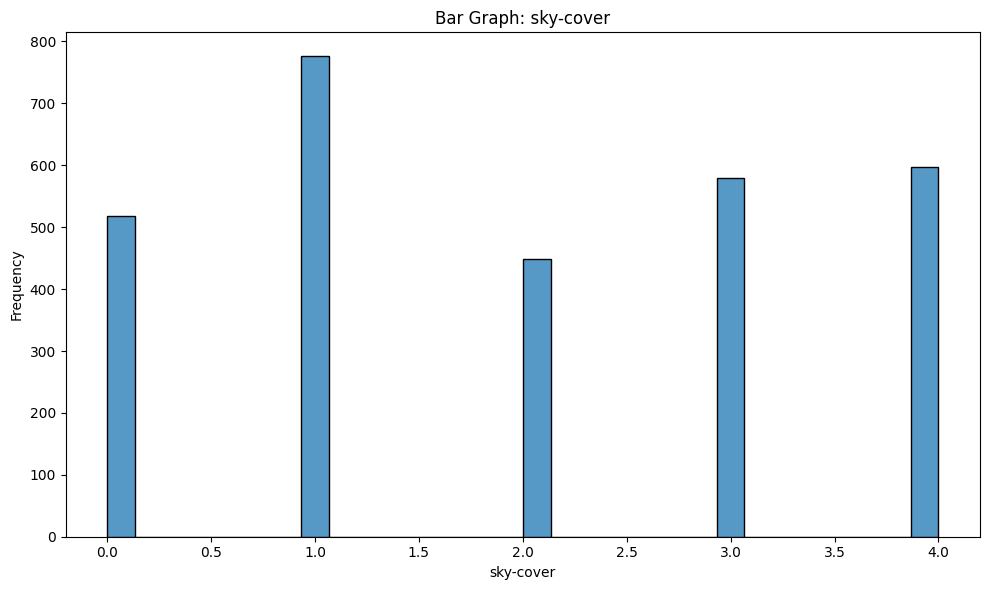

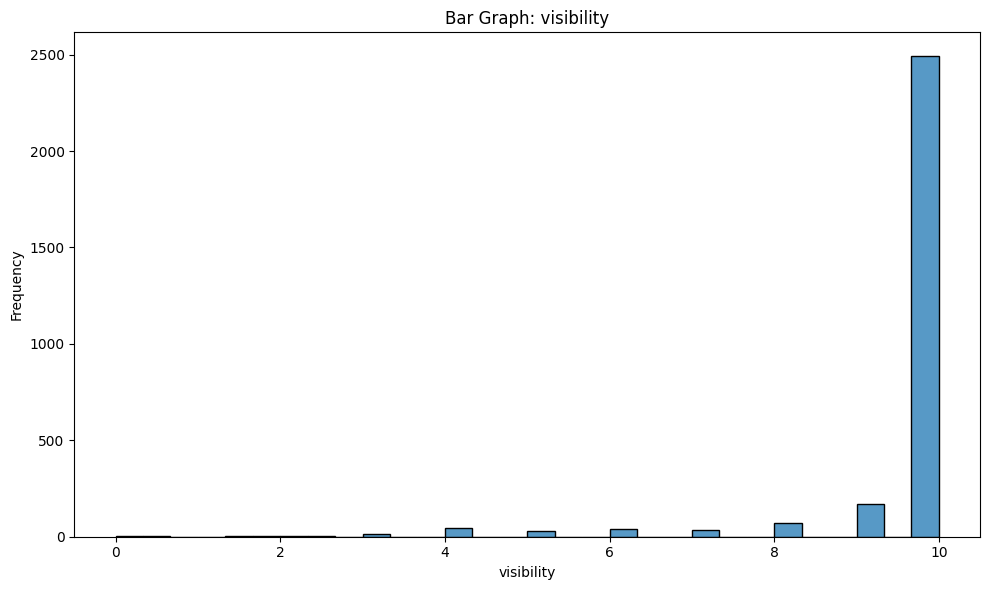

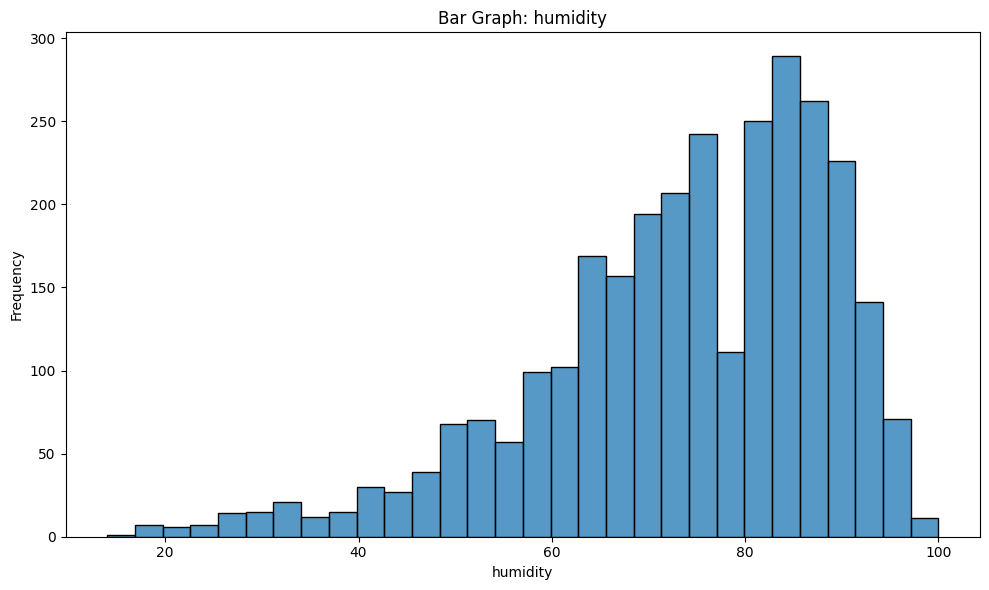

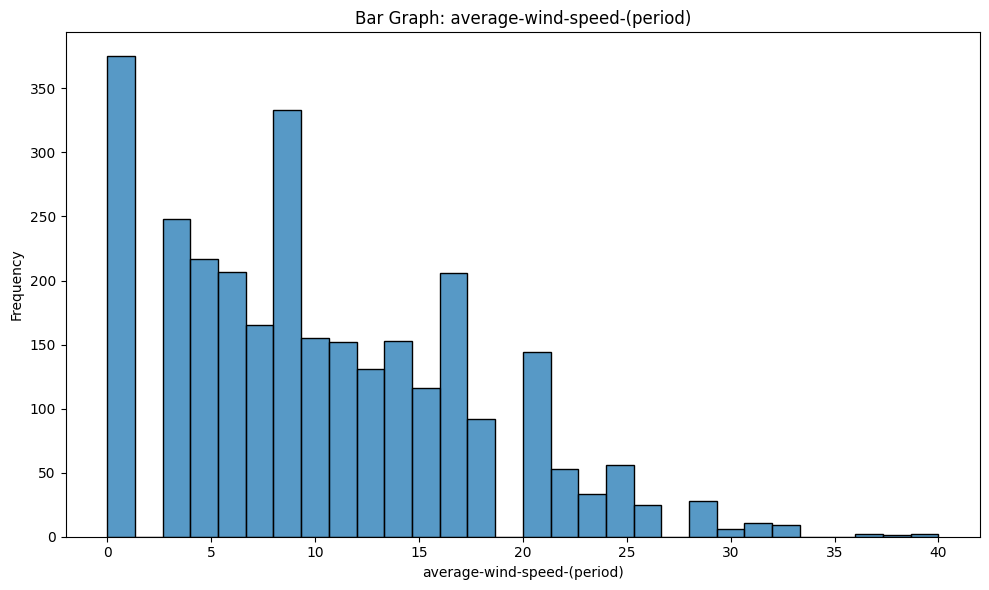

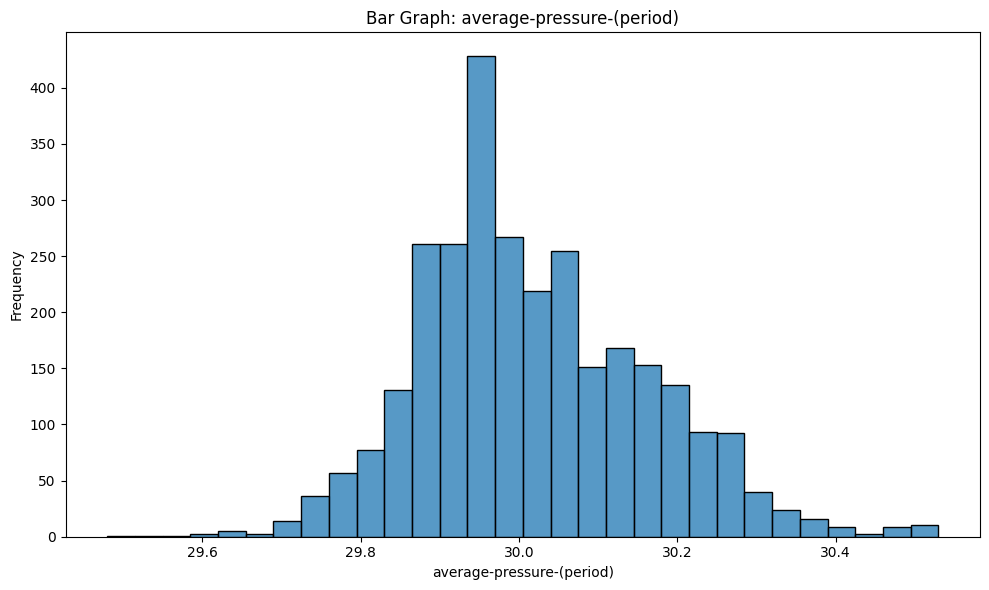

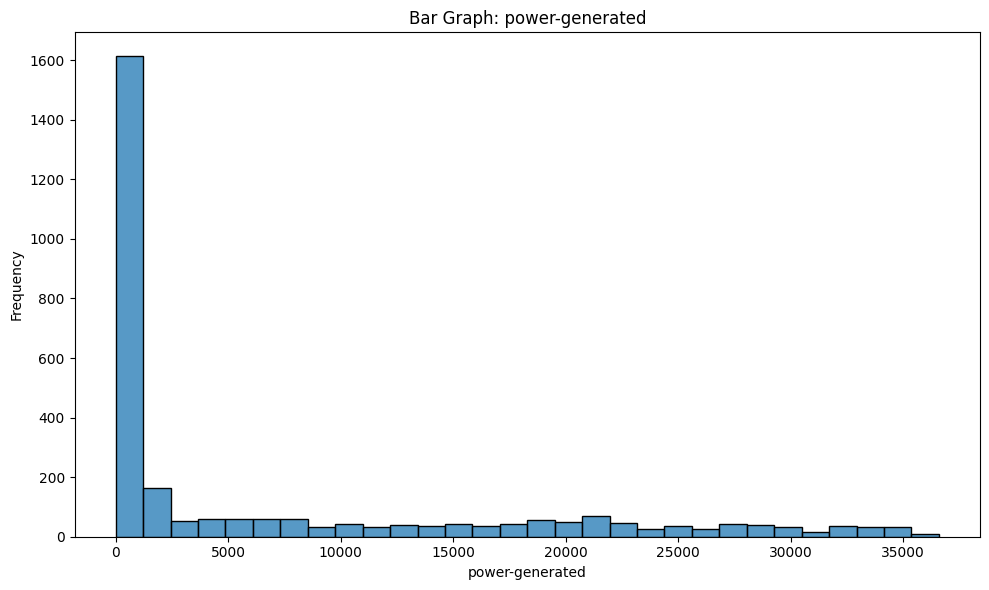

In [56]:

# Create bar plots for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], bins=30, kde=False)
    plt.title('Bar Graph: ' + column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

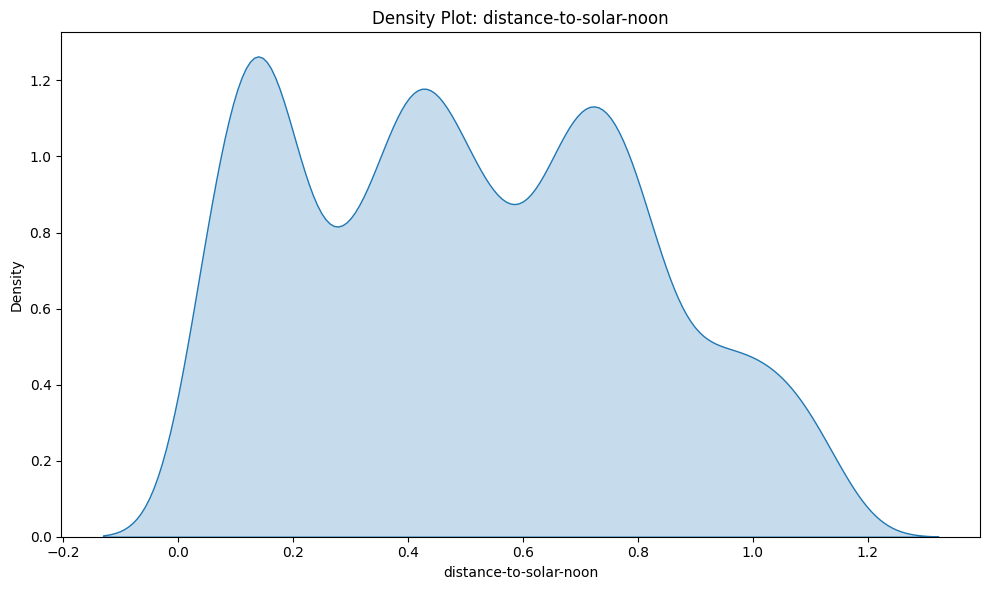

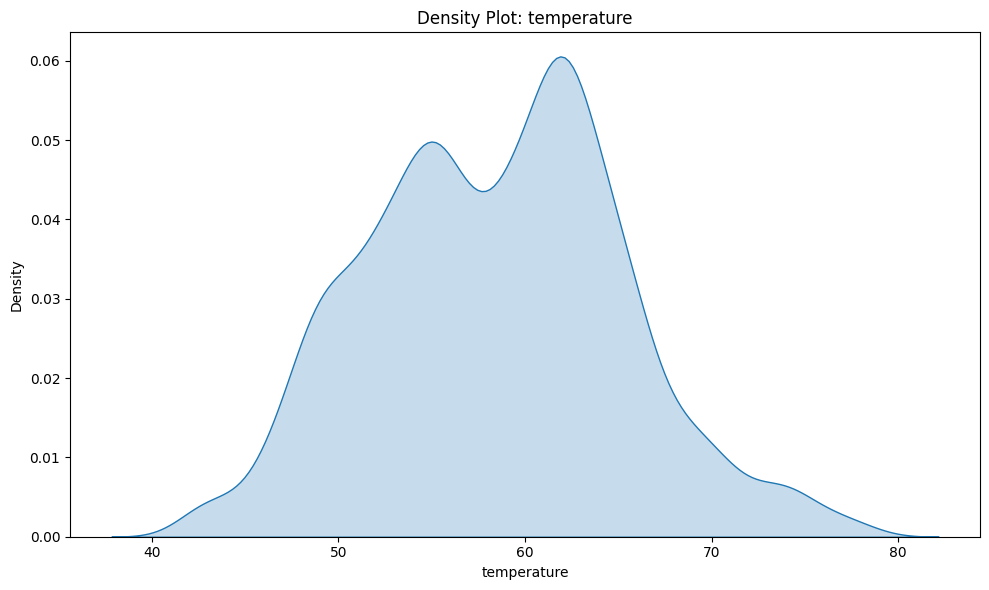

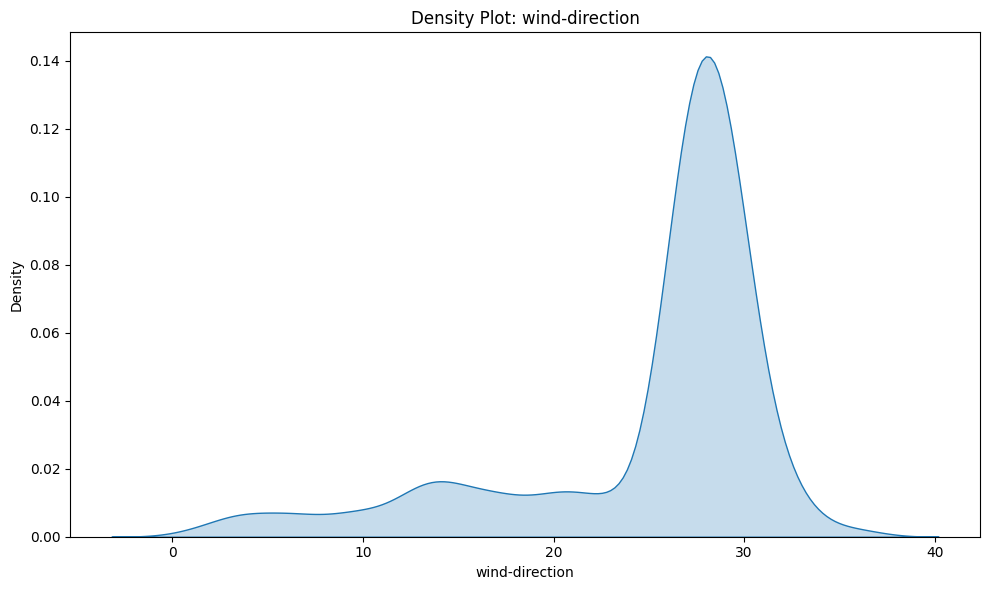

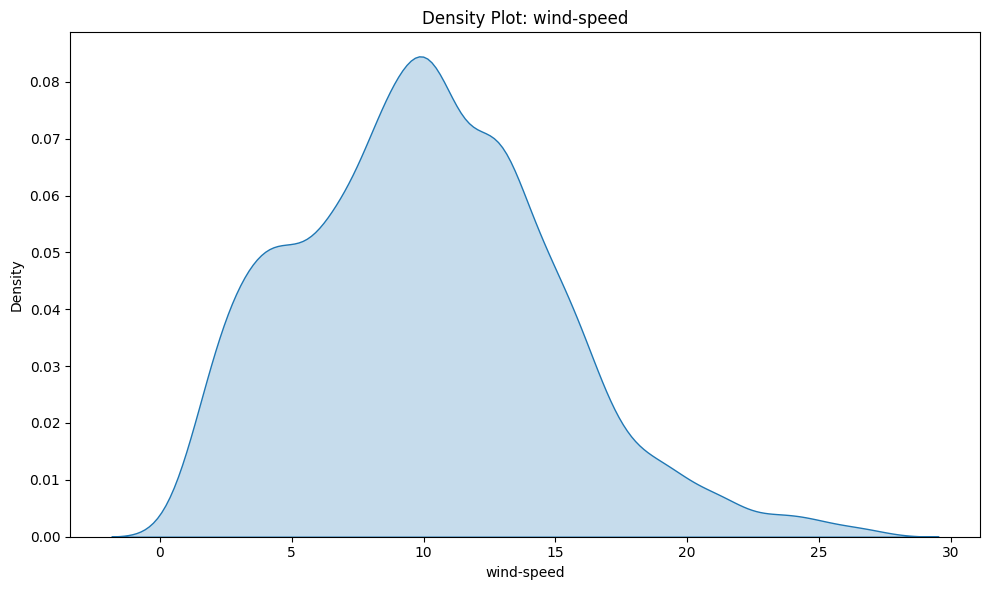

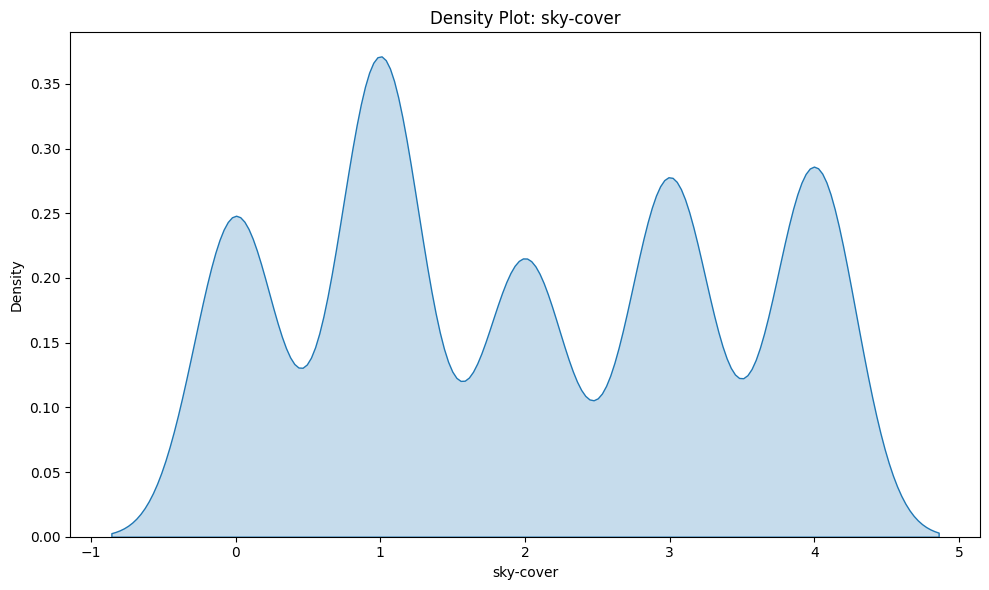

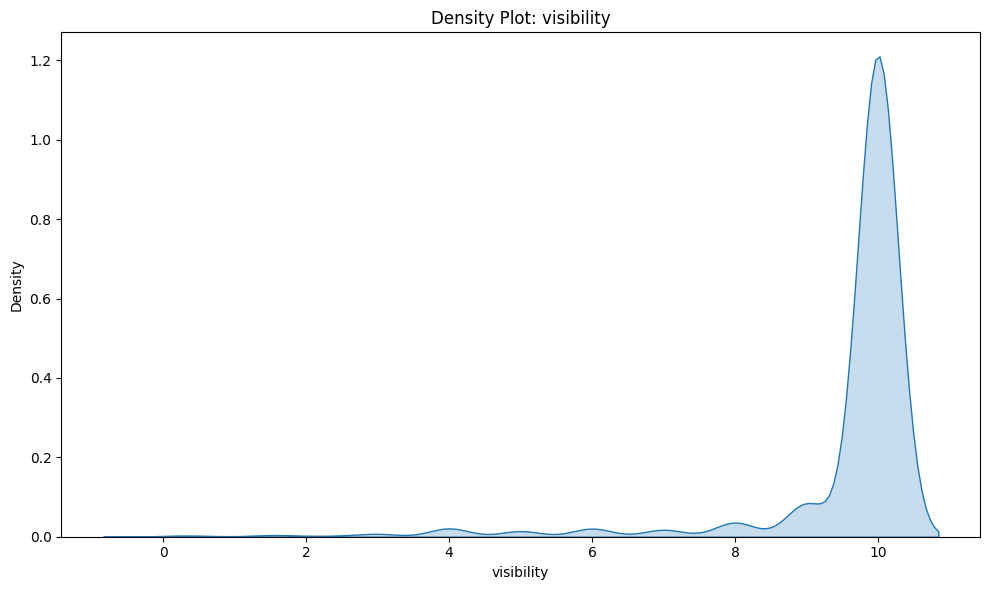

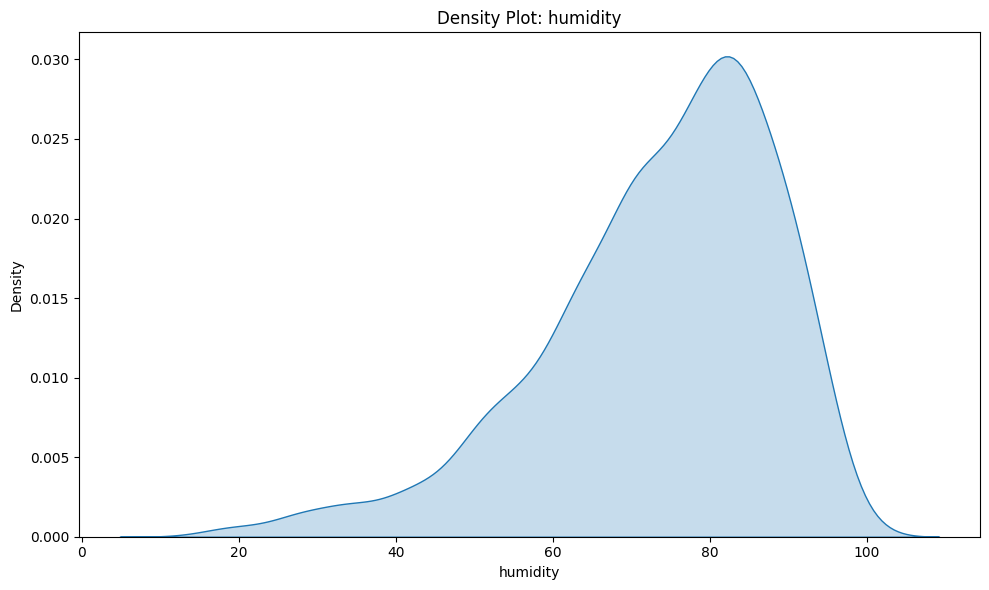

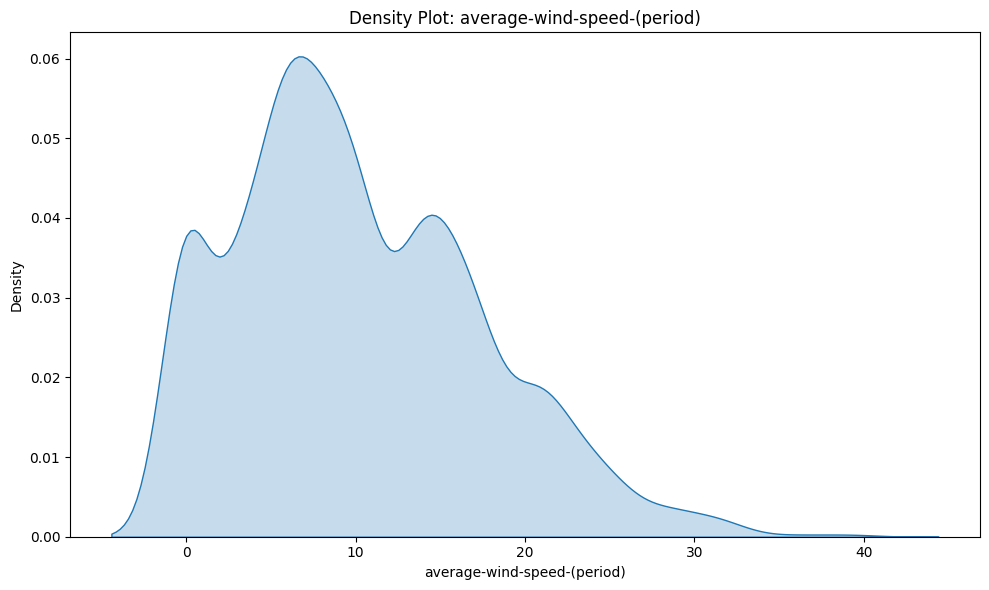

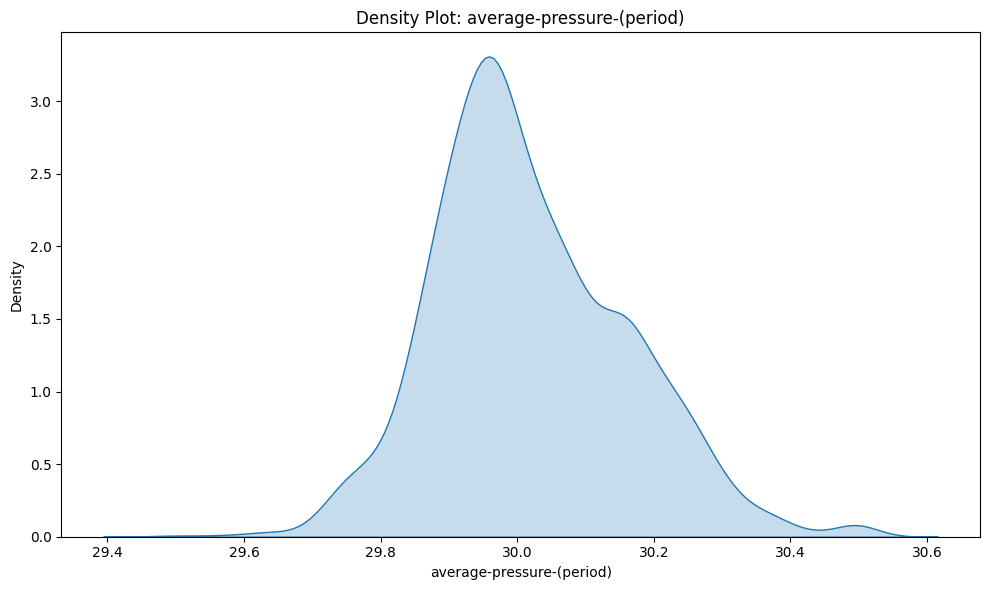

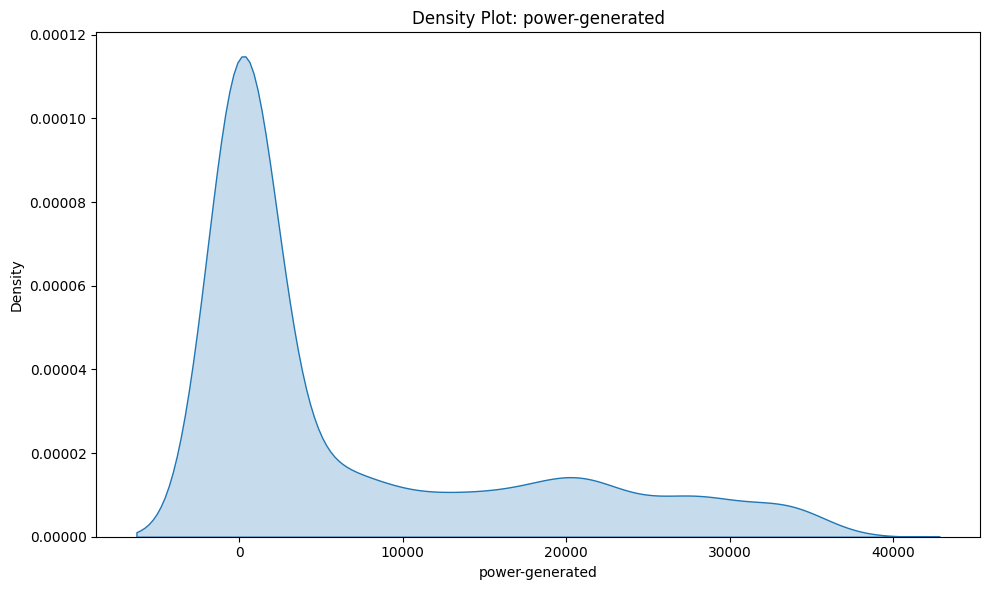

In [57]:
# Create density plots for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df[column], fill=True)
    plt.title(f'Density Plot: {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()

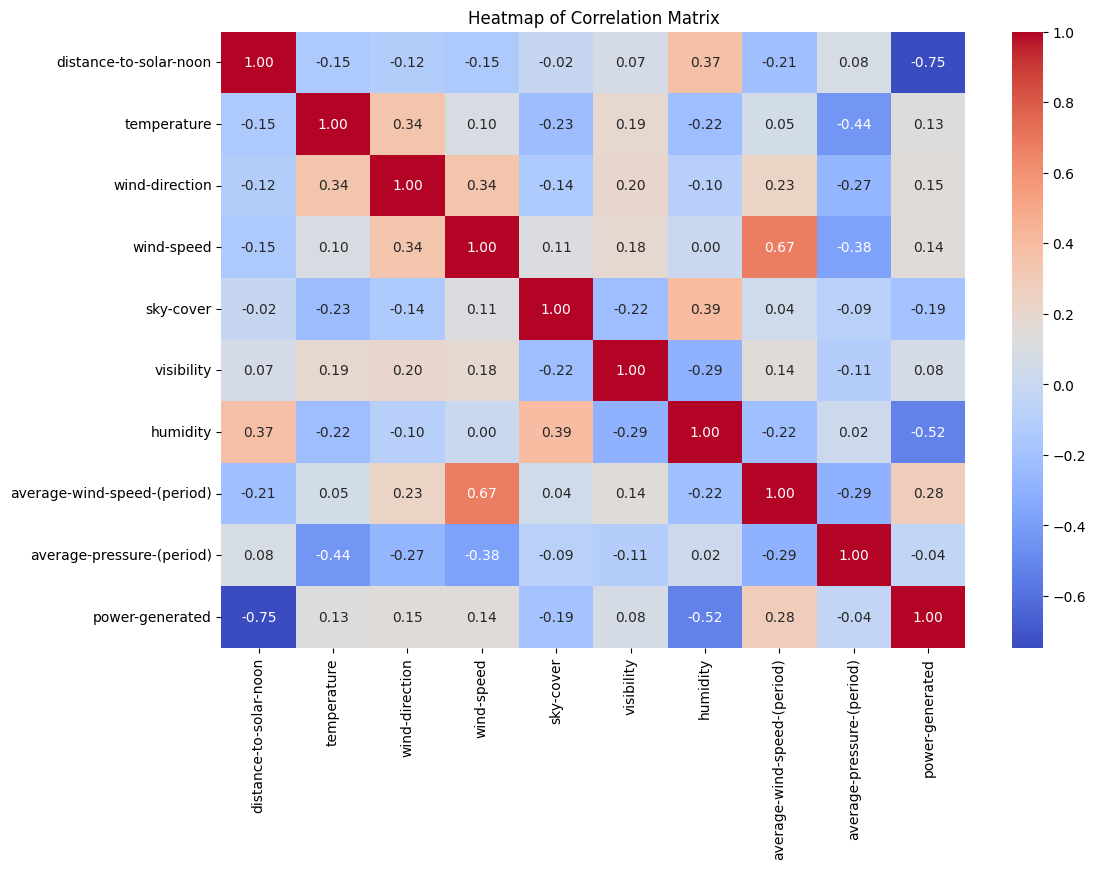

In [58]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix')
plt.show()


In [59]:
# Outlier detection

# Find the limits - Distance to solar moon
upper_limit = df['distance-to-solar-noon'].mean() + 3*df['distance-to-solar-noon'].std()
lower_limit = df['distance-to-solar-noon'].mean() - 3*df['distance-to-solar-noon'].std()
print('Distance to solar moon:')
print('Upper limit:',upper_limit)
print('Lower limit:',lower_limit)
# Find the outliers
distance_to_solar_noon_outliers = df.loc[(df['distance-to-solar-noon'] > upper_limit) | (df['distance-to-solar-noon'] < lower_limit)]
print('Total outliers:',len(distance_to_solar_noon_outliers))

print('')

# Find the limits - Temperature
upper_limit = df['temperature'].mean() + 3*df['temperature'].std()
lower_limit = df['temperature'].mean() - 3*df['temperature'].std()
print('Temperature:')
print('Upper limit:',upper_limit)
print('Lower limit:',lower_limit)
# Find the outliers
temperature_outliers = df.loc[(df['temperature'] > upper_limit) | (df['temperature'] < lower_limit)]
print('Total outliers:',len(temperature_outliers))

print('')

# Find the limits - Wind direction
upper_limit = df['wind-direction'].mean() + 3*df['wind-direction'].std()
lower_limit = df['wind-direction'].mean() - 3*df['wind-direction'].std()
print('Wind direction:')
print('Upper limit:',upper_limit)
print('Lower limit:',lower_limit)
# Find the outliers
wind_direction_outliers = df.loc[(df['wind-direction'] > upper_limit) | (df['wind-direction'] < lower_limit)]
print('Total outliers:',len(wind_direction_outliers))

print('')

# Find the limits - Wind speed
upper_limit = df['wind-speed'].mean() + 3*df['wind-speed'].std()
lower_limit = df['wind-speed'].mean() - 3*df['wind-speed'].std()
print('Wind speed:')
print('Upper limit:',upper_limit)
print('Lower limit:',lower_limit)
# Find the outliers
wind_speed_outliers = df.loc[(df['wind-speed'] > upper_limit) | (df['wind-speed'] < lower_limit)]
print('Total outliers:',len(wind_speed_outliers))

print('')

# Find the limits - Sky cover
upper_limit = df['sky-cover'].mean() + 3*df['sky-cover'].std()
lower_limit = df['sky-cover'].mean() - 3*df['sky-cover'].std()
print('Sky cover:')
print('Upper limit:',upper_limit)
print('Lower limit:',lower_limit)
# Find the outliers
sky_cover_outliers = df.loc[(df['sky-cover'] > upper_limit) | (df['sky-cover'] < lower_limit)]
print('Total outliers:',len(sky_cover_outliers))

print('')

# Find the limits - Visibility
upper_limit = df['visibility'].mean() + 3*df['visibility'].std()
lower_limit = df['visibility'].mean() - 3*df['visibility'].std()
print('Visibility:')
print('Upper limit:',upper_limit)
print('Lower limit:',lower_limit)
# Find the outliers
visibility_outliers = df.loc[(df['visibility'] > upper_limit) | (df['visibility'] < lower_limit)]
print('Total outliers:',len(visibility_outliers))

print('')

# Find the limits - Humidity
upper_limit = df['humidity'].mean() + 3*df['humidity'].std()
lower_limit = df['humidity'].mean() - 3*df['humidity'].std()
print('Humidity:')
print('Upper limit:',upper_limit)
print('Lower limit:',lower_limit)
# Find the outliers
humidity_outliers = df.loc[(df['humidity'] > upper_limit) | (df['humidity'] < lower_limit)]
print('Total outliers:',len(humidity_outliers))

print('')

# Find the limits - average-wind-speed-(period)_outliers
upper_limit = df['average-wind-speed-(period)'].mean() + 3*df['average-wind-speed-(period)'].std()
lower_limit = df['average-wind-speed-(period)'].mean() - 3*df['average-wind-speed-(period)'].std()
print('Average-wind-speed-(period):')
print('Upper limit:',upper_limit)
print('Lower limit:',lower_limit)
# Find the outliers
average_wind_speed_period_outliers = df.loc[(df['average-wind-speed-(period)'] > upper_limit) | (df['average-wind-speed-(period)'] < lower_limit)]
print('Total outliers:',len(average_wind_speed_period_outliers))

print('')

# Find the limits - average-pressure-(period)
upper_limit = df['average-pressure-(period)'].mean() + 3*df['average-pressure-(period)'].std()
lower_limit = df['average-pressure-(period)'].mean() - 3*df['average-pressure-(period)'].std()
print('Average-pressure-(period):')
print('Upper limit:',upper_limit)
print('Lower limit:',lower_limit)
# Find the outliers
average_pressure_period_outliers = df.loc[(df['average-pressure-(period)'] > upper_limit) | (df['average-pressure-(period)'] < lower_limit)]
print('Total outliers:',len(average_pressure_period_outliers))

print('')

# Find the limits - power_generated
upper_limit = df['power-generated'].mean() + 3*df['power-generated'].std()
lower_limit = df['power-generated'].mean() - 3*df['power-generated'].std()
print('Power generated:')
print('Upper limit:',upper_limit)
print('Lower limit:',lower_limit)
# Find the outliers
power_generated_outliers = df.loc[(df['power-generated'] > upper_limit) | (df['power-generated'] < lower_limit)]
print('Total outliers:',len(power_generated_outliers))

# Trimming - Deleting the outliers
# new_df = df.loc[(df['distance-to-solar-noon'] < upper_limit) & (df['distance-to-solar-noon'] > lower_limit)]
# print('Data after outlier removal:',len(new_df))

Distance to solar moon:
Upper limit: 1.3973646600678722
Lower limit: -0.3907766039425298
Total outliers: 0

Temperature:
Upper limit: 78.99209408680196
Lower limit: 37.9448922145679
Total outliers: 0

Wind direction:
Upper limit: 45.6989586625041
Lower limit: 4.207890652564391
Total outliers: 64

Wind speed:
Upper limit: 24.61154150937696
Lower limit: -4.417568906637232
Total outliers: 16

Sky cover:
Upper limit: 6.223604788361949
Lower limit: -2.2482623226085243
Total outliers: 0

Visibility:
Upper limit: 13.709356654846633
Lower limit: 5.406054304057478
Total outliers: 109

Humidity:
Upper limit: 118.74511632997351
Lower limit: 28.282280930300466
Total outliers: 35

Average-wind-speed-(period):
Upper limit: 31.909765062030857
Lower limit: -11.652230815455516
Total outliers: 14

Average-pressure-(period):
Upper limit: 30.443777774994714
Lower limit: 29.59174277295049
Total outliers: 23

Power generated:
Upper limit: 37916.85547263351
Lower limit: -23957.163006880084
Total outliers: 0


In [60]:
# Standardization scaling

X = df.drop('power-generated',axis=1)
X

distance-to-solar-noon  temperature  wind-direction  wind-speed  \
0                   0.859897           69              28         7.5   
1                   0.628535           69              28         7.5   
2                   0.397172           69              28         7.5   
3                   0.165810           69              28         7.5   
4                   0.065553           69              28         7.5   
...                      ...          ...             ...         ...   
2915                0.166453           63              27        13.9   
2916                0.064020           63              27        13.9   
2917                0.294494           63              27        13.9   
2918                0.524968           63              27        13.9   
2919                0.755442           63              27        13.9   

      sky-cover  visibility  humidity  average-wind-speed-(period)  \
0             0        10.0        75                          8.0   
1             0        10.0        77                          5.0   
2             0        10.0        70                          0.0   
3             0        10.0        33                          0.0   
4             0        10.0        21                          3.0   
...         ...         ...       ...                          ...   
2915          4        10.0        75                         10.0   
2916          1        10.0        66                         15.0   
2917          2        10.0        68                         21.0   
2918          2        10.0        81                         17.0   
2919          1        10.0        81                         11.0   

      average-pressure-(period)  
0                         29.82  
1                         29.85  
2                         29.89  
3                         29.91  
4                         29.89  
...                         ...  
2915                      29.93  
2916                      29.91  
2917                      29.88  
2918                      29.87  
2919                      29.90  

[2920 rows x 9 columns]

In [61]:
y = df['power-generated']
y

0           0
1           0
2        5418
3       25477
4       30069
        ...  
2915     6995
2916    29490
2917    17257
2918      677
2919        0
Name: power-generated, Length: 2920, dtype: int64

In [62]:
# Standard scaling

from sklearn.preprocessing import StandardScaler

for col in X:
    ss = StandardScaler()
    scale_fit = ss.fit(X)
    X = scale_fit.transform(X)

X

array([[ 1.19676525,  1.53968751,  0.440639  , ...,  0.09859668,
        -0.2932554 , -1.3928593 ],
       [ 0.4203095 ,  1.53968751,  0.440639  , ...,  0.23127056,
        -0.70653038, -1.18156419],
       [-0.35614625,  1.53968751,  0.440639  , ..., -0.23308801,
        -1.39532201, -0.89983737],
       ...,
       [-0.70073508,  0.66249821,  0.2960048 , ..., -0.36576189,
         1.49760285, -0.97026908],
       [ 0.07273813,  0.66249821,  0.2960048 , ...,  0.49661832,
         0.94656954, -1.04070078],
       [ 0.84621133,  0.66249821,  0.2960048 , ...,  0.49661832,
         0.12001958, -0.82940567]])

In [63]:
!pip install xgboost

In [64]:
# Model building

# The code imports essential libraries for data manipulation (pandas), machine learning (sklearn and xgboost),
# and data visualization (matplotlib and seaborn).
# The additional models Lasso, Ridge, AdaBoost, XGBoost, and SVR are imported to
# explore a wide range of regression techniques.

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
# Split the data into training and testing sets (80% train, 20% test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train
X_test
y_train
y_test

2437    21804
2470     2065
2359        0
789      5654
1642     3621
        ...  
2880        0
2295        0
2222     1731
1090       15
542         0
Name: power-generated, Length: 584, dtype: int64

In [66]:
# Initialize models
#Various regression models are initialized, including both linear models with regularization (Lasso and Ridge),
#ensemble methods (Random Forest, AdaBoost, XGBoost), and a support vector machine.

models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(random_state=42),
    'Ridge': Ridge(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'SVR': SVR()
}

Linear Regression:
R²: 0.6251
RMSE: 6284.4996



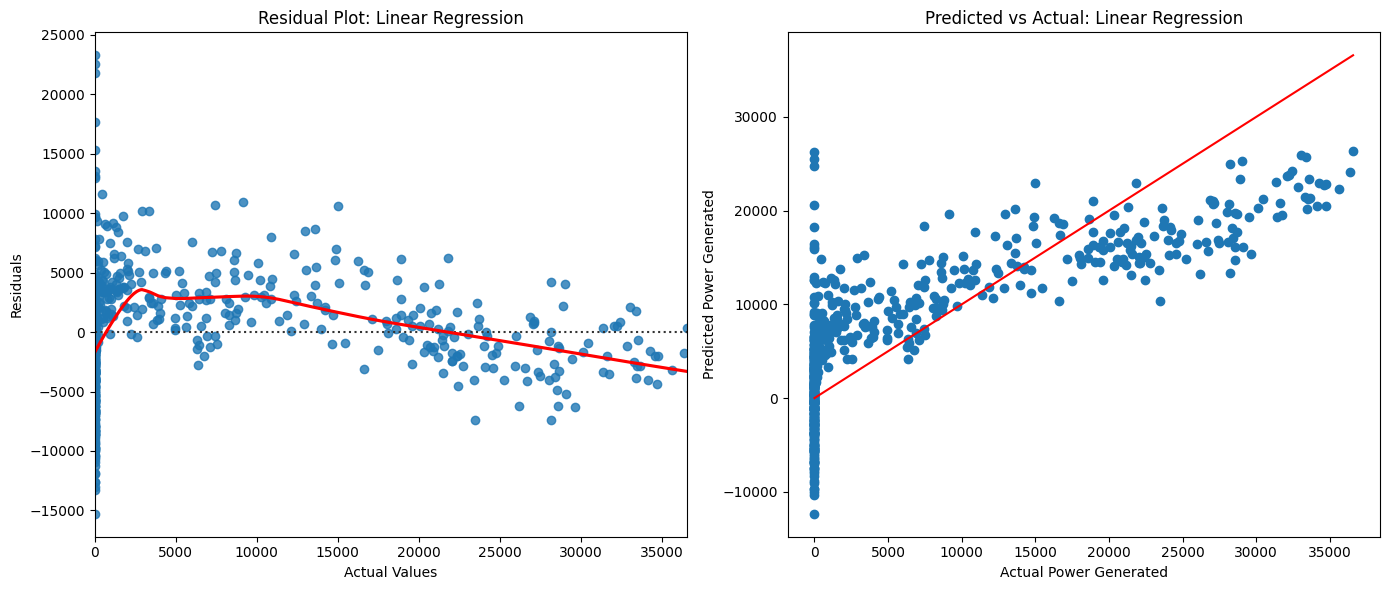

Lasso:
R²: 0.6251
RMSE: 6284.4593



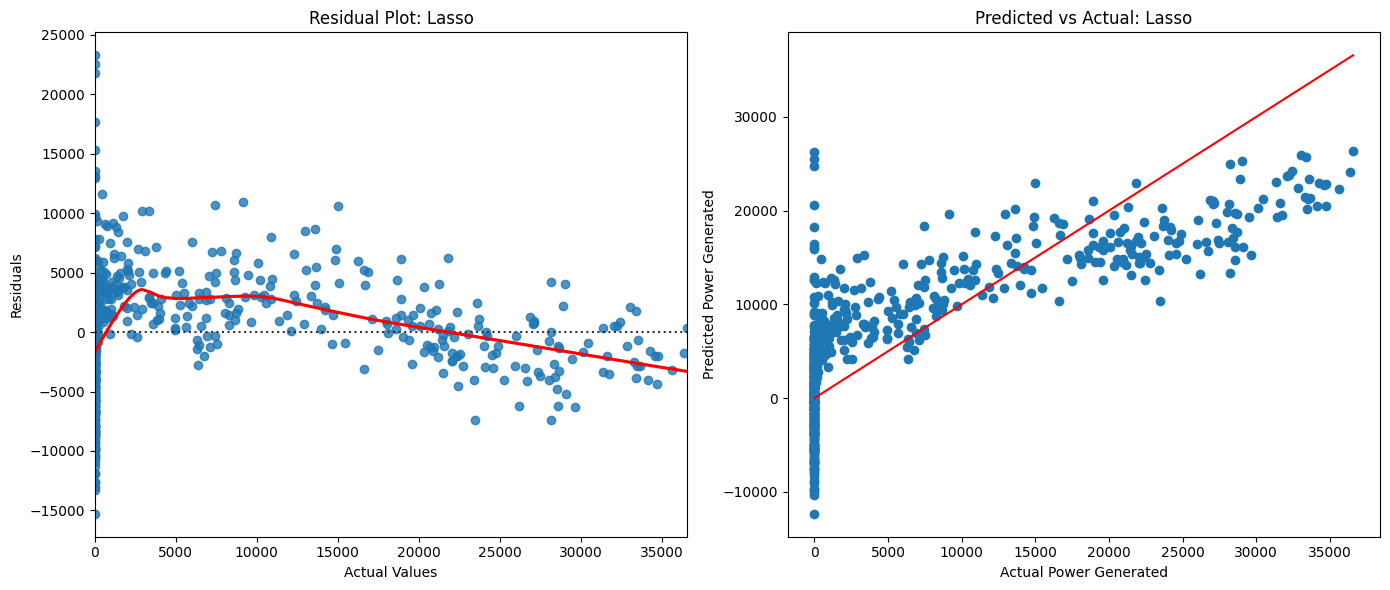

Ridge:
R²: 0.6251
RMSE: 6284.5214



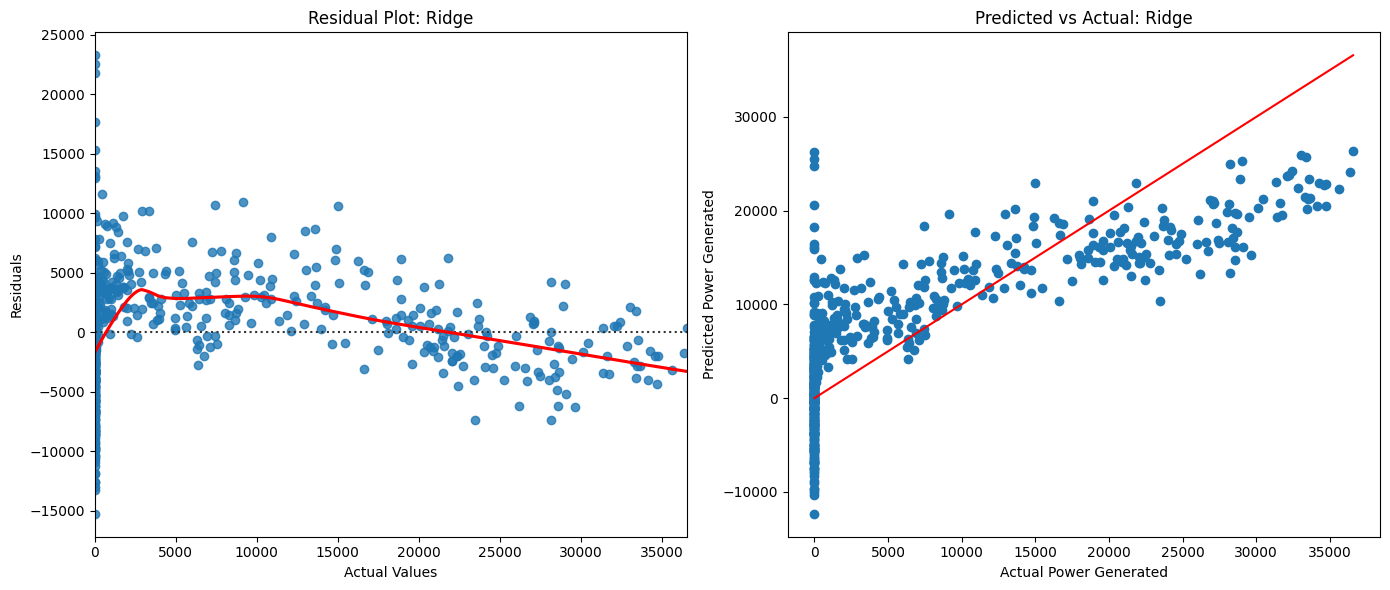

Decision Tree:
R²: 0.8175
RMSE: 4384.8127



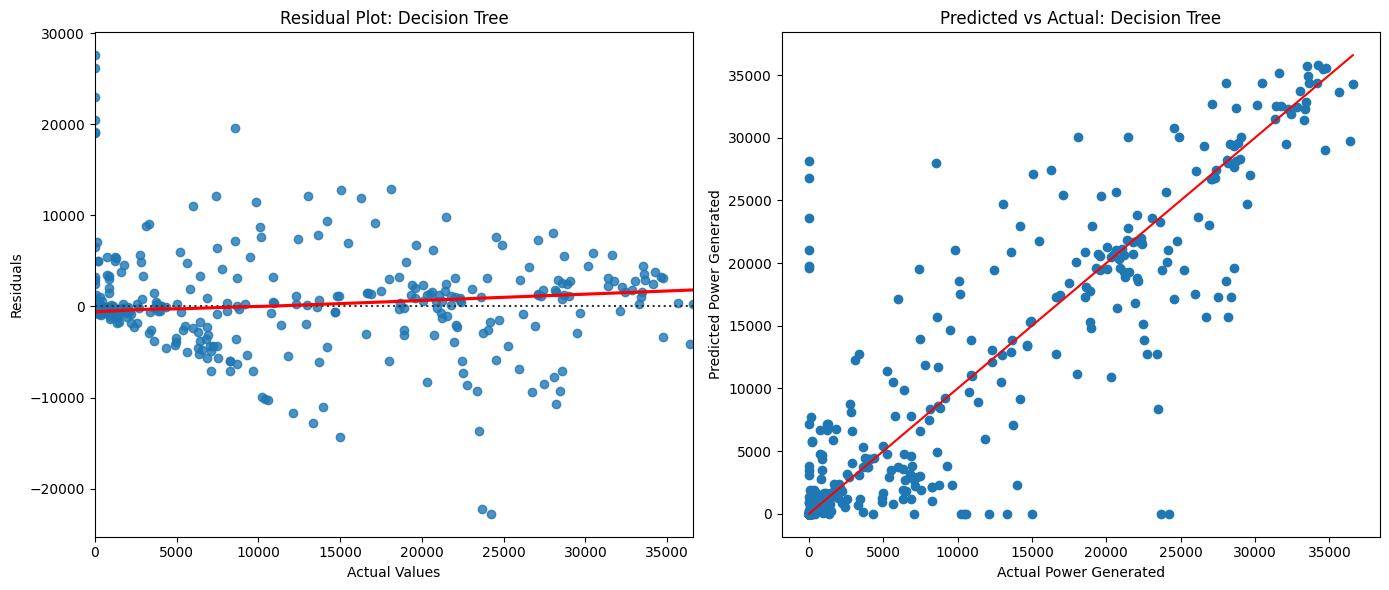

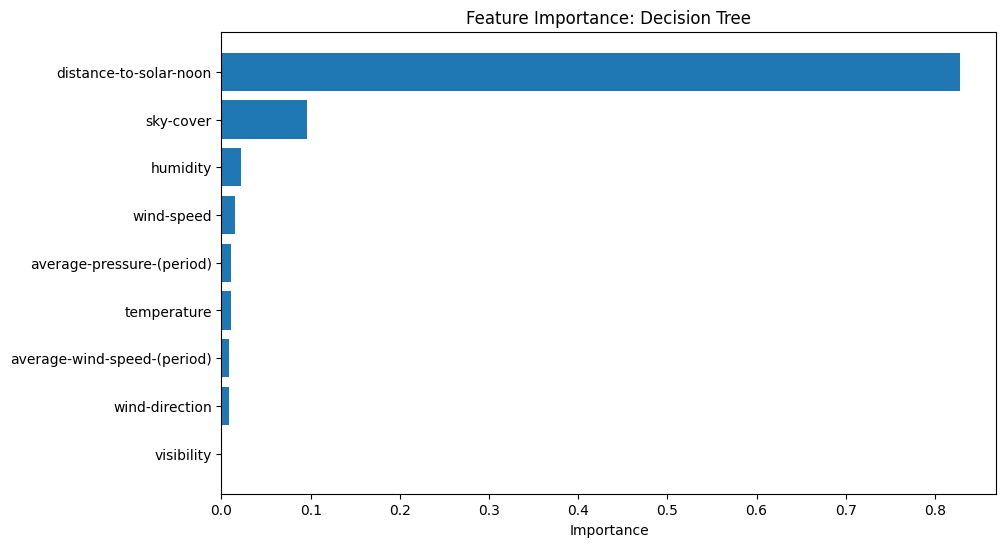

Random Forest:
R²: 0.8903
RMSE: 3400.0781



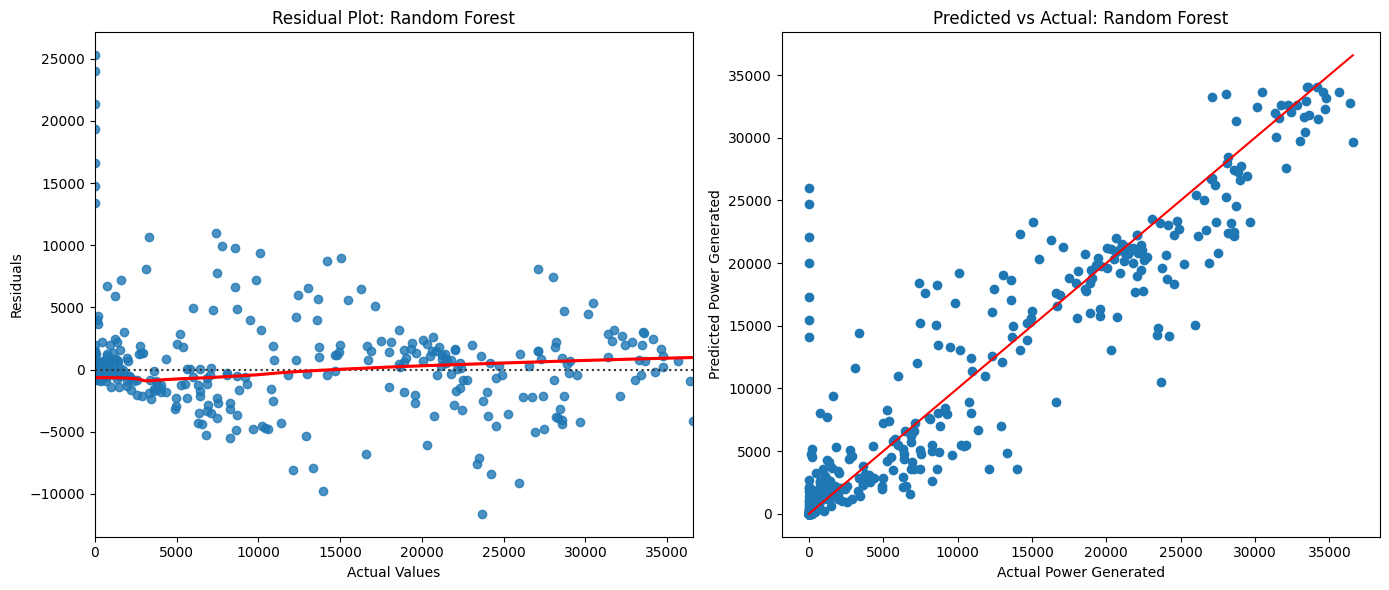

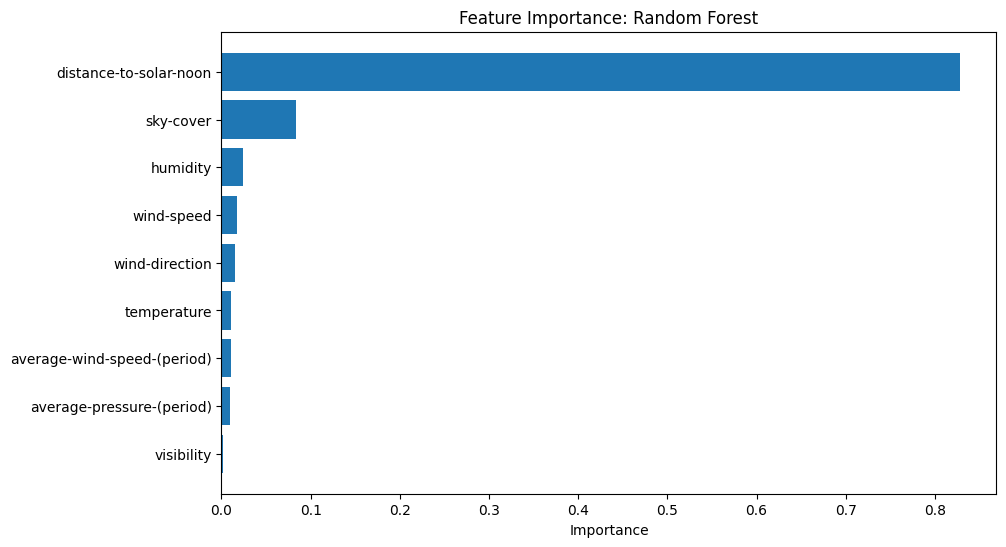

AdaBoost:
R²: 0.8196
RMSE: 4359.4468



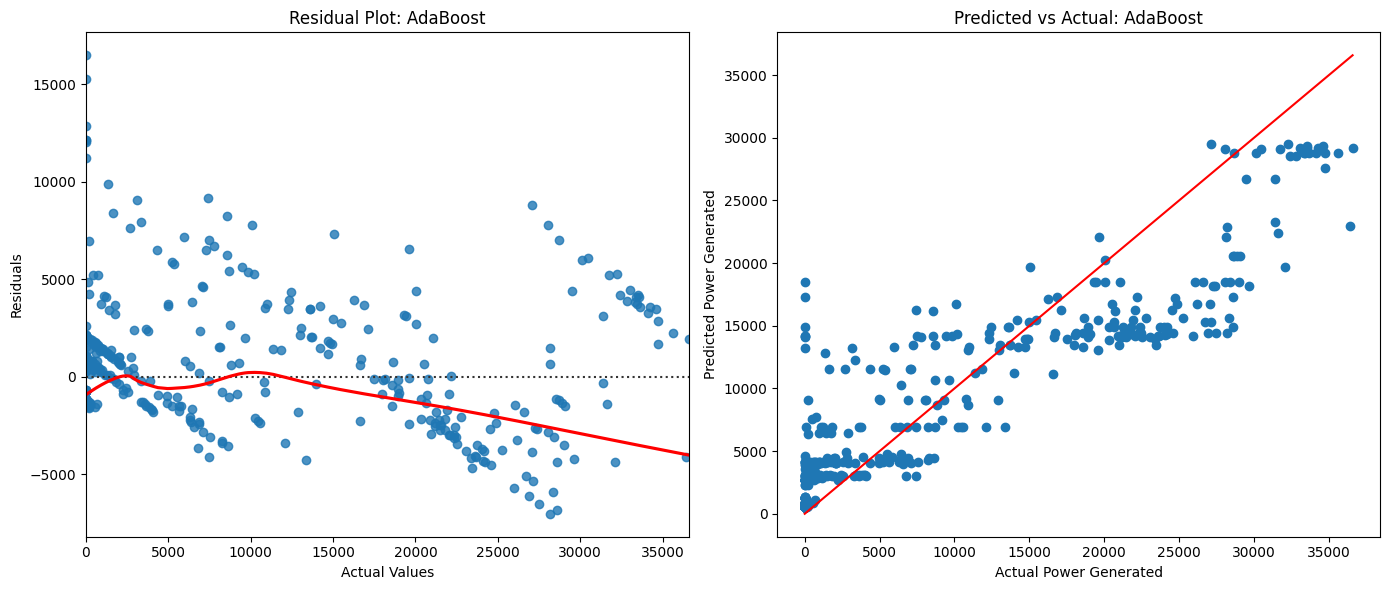

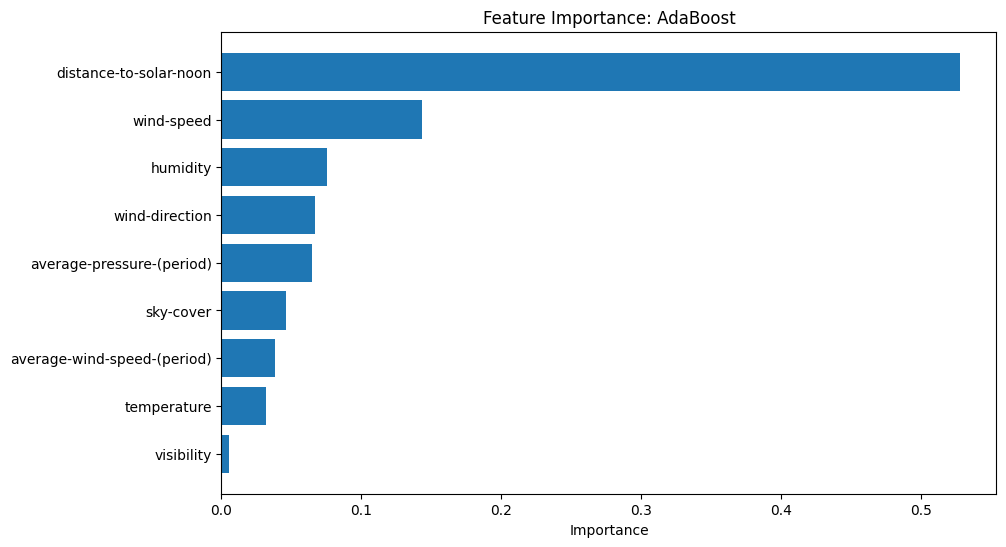

XGBoost:
R²: 0.8993
RMSE: 3256.1055



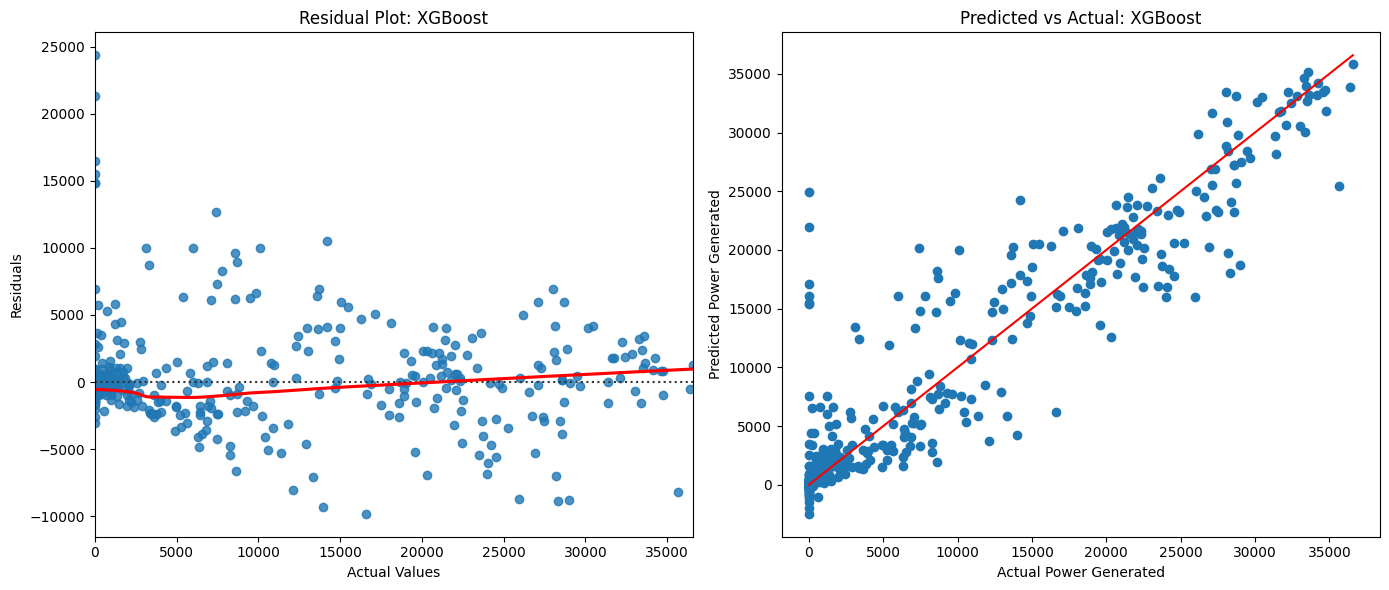

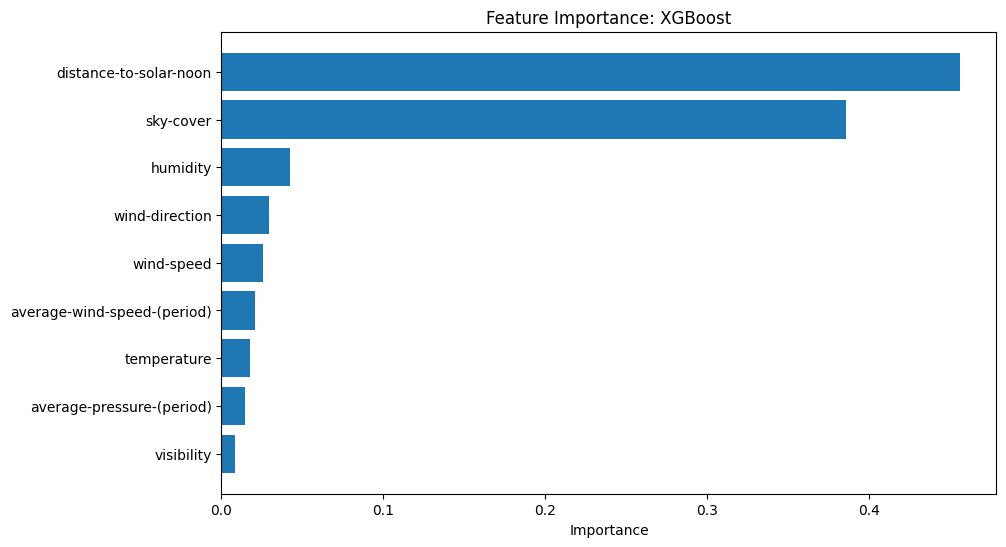

SVR:
R²: -0.3805
RMSE: 12058.8143



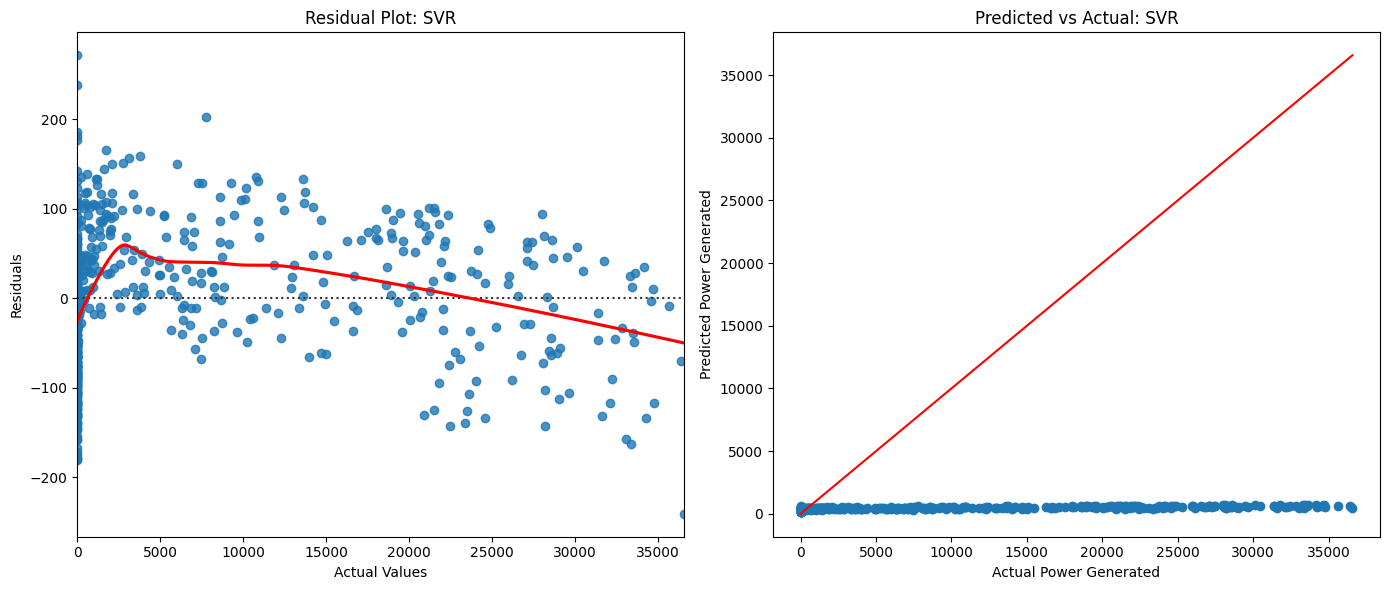

In [67]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f'{name}:')
    print(f'R²: {r2:.4f}')
    print(f'RMSE: {rmse:.4f}\n')

    # Plot Residuals
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.residplot(x=y_test, y=y_pred, lowess=True, line_kws={'color': 'red'})
    plt.title(f'Residual Plot: {name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Residuals')

    # Plot Predicted vs Actual
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_pred)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # 45-degree line
    plt.title(f'Predicted vs Actual: {name}')
    plt.xlabel('Actual Power Generated')
    plt.ylabel('Predicted Power Generated')

    plt.tight_layout()
    plt.show()

    # Feature Importance Plot for Tree-based models
    if hasattr(model, 'feature_importances_'):
        plt.figure(figsize=(10, 6))
        feature_importance = model.feature_importances_
        sorted_idx = np.argsort(feature_importance)
        plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
        plt.yticks(range(len(sorted_idx)), np.array(df.columns.drop('power-generated'))[sorted_idx])
        plt.title(f'Feature Importance: {name}')
        plt.xlabel('Importance')
        plt.show()

In [68]:
#Evaluating models with different metrics provides a comprehensive performance overview.
#Visualizing residuals and feature importance helps interpret model behavior and feature relevance.
#Ensure that plots are clear and convey useful insights.

Lasso Prediction: [ 1.6728e+04  1.0074e+04  5.1130e+03  6.7250e+03  7.8320e+03  2.0588e+04
  1.2100e+02 -2.1250e+03  2.5780e+03  3.2020e+03  7.2880e+03 -1.4780e+03
  1.7515e+04  1.9013e+04  9.7700e+03 -8.1650e+03 -9.5840e+03  7.3350e+03
  7.1300e+03  6.1140e+03  1.5093e+04 -8.5650e+03  1.2531e+04  5.6340e+03
  1.4903e+04  4.6470e+03  1.6437e+04  3.6190e+03  1.8407e+04  1.8443e+04
  1.7643e+04  2.3428e+04  1.4170e+04  1.9690e+03 -3.2300e+02  1.4449e+04
 -9.3000e+02  1.0660e+04  2.3669e+04 -7.2770e+03  1.2781e+04  5.8400e+02
  1.6944e+04 -9.8400e+02  7.8870e+03  1.4891e+04  1.0578e+04  2.0127e+04
  1.4903e+04 -1.0500e+03  3.0380e+03  1.5396e+04  1.6629e+04 -7.3080e+03
  7.8360e+03  3.4050e+03  9.8480e+03  1.1011e+04 -6.5440e+03  7.7480e+03
  2.6346e+04  1.0464e+04 -7.7000e+01  1.4376e+04  1.6328e+04  1.1057e+04
  5.2730e+03  5.4940e+03  2.0475e+04  9.5000e+03  1.4937e+04  1.4891e+04
  2.0211e+04  4.3070e+03  7.0040e+03  1.5214e+04  9.0190e+03 -5.1600e+02
 -2.0930e+03  8.3400e+03  3.3730e

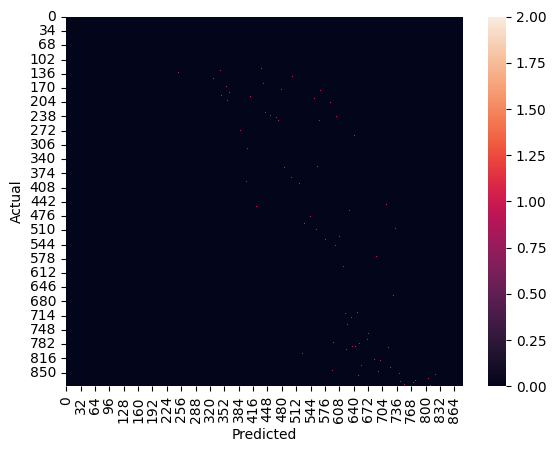

              precision    recall  f1-score   support

    -12702.0       0.00      0.00      0.00       0.0
    -10033.0       0.00      0.00      0.00       0.0
     -9967.0       0.00      0.00      0.00       0.0
     -9860.0       0.00      0.00      0.00       0.0
     -9584.0       0.00      0.00      0.00       0.0
     -8849.0       0.00      0.00      0.00       0.0
     -8565.0       0.00      0.00      0.00       0.0
     -8165.0       0.00      0.00      0.00       0.0
     -7964.0       0.00      0.00      0.00       0.0
     -7810.0       0.00      0.00      0.00       0.0
     -7774.0       0.00      0.00      0.00       0.0
     -7658.0       0.00      0.00      0.00       0.0
     -7308.0       0.00      0.00      0.00       0.0
     -7277.0       0.00      0.00      0.00       0.0
     -7074.0       0.00      0.00      0.00       0.0
     -6932.0       0.00      0.00      0.00       0.0
     -6818.0       0.00      0.00      0.00       0.0
     -6806.0       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [69]:
# Model evaluation for Lasso regression

from sklearn import linear_model
from sklearn.metrics import confusion_matrix, classification_report

lasso_reg = linear_model.Lasso(alpha=50, max_iter=50, tol=0.1)
lasso_reg.fit(X_train, y_train)
pred_Lasso = lasso_reg.predict(X_test).round()
print("Lasso Prediction:",pred_Lasso)
print("\nLasso score for training data:",lasso_reg.score(X_train,y_train))
print("Lasso score for testing data:",lasso_reg.score(X_test,y_test))
print("Lasso slope: %.2f" % lasso_reg.coef_[0])
print("Lasso intercept: %.2f" % lasso_reg.intercept_)
print("Lasso Mean Squared Error",mean_squared_error(y_test, pred_Lasso))
print("Lasso Root Mean Squared Error",np.sqrt(mean_squared_error(y_test, pred_Lasso)))
cm = confusion_matrix(y_test,pred_Lasso)
print("\nLasso Confusion Matrix:",cm)
sns.heatmap(cm)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_test,pred_Lasso))

Ridge prediction: [ 1.6692e+04  1.0031e+04  5.1690e+03  6.8660e+03  7.6240e+03  2.0525e+04
  3.9300e+02 -2.4190e+03  2.5760e+03  3.0820e+03  7.0400e+03 -1.3640e+03
  1.7610e+04  1.8964e+04  9.9000e+03 -8.0750e+03 -9.4420e+03  7.4150e+03
  7.2360e+03  6.1950e+03  1.5077e+04 -8.6000e+03  1.2496e+04  5.5720e+03
  1.4834e+04  4.2800e+03  1.6488e+04  3.4910e+03  1.8725e+04  1.8083e+04
  1.7529e+04  2.3210e+04  1.3825e+04  1.8250e+03 -3.5000e+02  1.4112e+04
 -9.6400e+02  1.0570e+04  2.3461e+04 -6.7430e+03  1.2810e+04  7.5700e+02
  1.6934e+04 -8.1800e+02  7.8970e+03  1.4577e+04  1.0580e+04  1.9814e+04
  1.4693e+04 -8.6500e+02  3.1870e+03  1.5178e+04  1.6313e+04 -7.1630e+03
  7.8760e+03  3.5270e+03  9.7450e+03  1.0396e+04 -6.1650e+03  7.2380e+03
  2.6153e+04  1.0235e+04 -1.6400e+02  1.4118e+04  1.6086e+04  1.1071e+04
  5.1230e+03  5.3750e+03  2.0241e+04  9.3620e+03  1.4981e+04  1.4914e+04
  2.0240e+04  4.1360e+03  7.0130e+03  1.5097e+04  9.0430e+03 -2.5600e+02
 -1.4880e+03  8.3510e+03  3.4790e

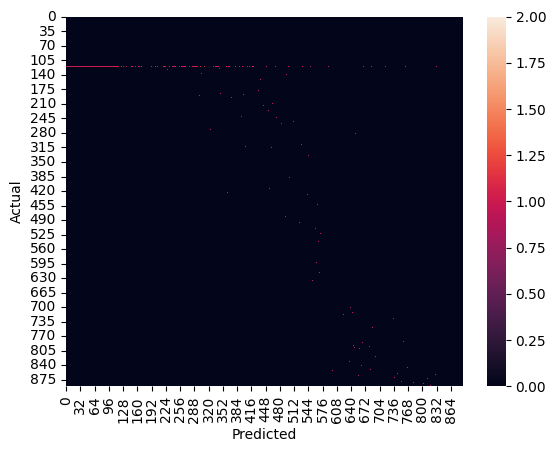

              precision    recall  f1-score   support

    -12026.0       0.00      0.00      0.00       0.0
    -10099.0       0.00      0.00      0.00       0.0
     -9786.0       0.00      0.00      0.00       0.0
     -9442.0       0.00      0.00      0.00       0.0
     -9385.0       0.00      0.00      0.00       0.0
     -8847.0       0.00      0.00      0.00       0.0
     -8600.0       0.00      0.00      0.00       0.0
     -8075.0       0.00      0.00      0.00       0.0
     -7767.0       0.00      0.00      0.00       0.0
     -7481.0       0.00      0.00      0.00       0.0
     -7250.0       0.00      0.00      0.00       0.0
     -7205.0       0.00      0.00      0.00       0.0
     -7163.0       0.00      0.00      0.00       0.0
     -6880.0       0.00      0.00      0.00       0.0
     -6743.0       0.00      0.00      0.00       0.0
     -6628.0       0.00      0.00      0.00       0.0
     -6610.0       0.00      0.00      0.00       0.0
     -6557.0       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [70]:
# Model evaluation for Ridge regression

from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=50, max_iter=50, tol=0.1)
ridge_reg.fit(X_train, y_train)
pred_Ridge = ridge_reg.predict(X_test).round()
print("Ridge prediction:",pred_Ridge)
print("\nRidge score for training data:",ridge_reg.score(X_train, y_train))
print("Ridge score for testing data:",ridge_reg.score(X_test, y_test))
print("Ridge slope: %.2f" % ridge_reg.coef_[0])
print("Ridge intercept: %.2f" % ridge_reg.intercept_)
print("Ridge Mean Squared Error",mean_squared_error(y_test, pred_Ridge))
print("Ridge Root Mean Squared Error",np.sqrt(mean_squared_error(y_test, pred_Ridge)))
cm = confusion_matrix(y_test,pred_Ridge)
print("\nRidge Confusion Matrix:",cm)
sns.heatmap(cm)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_test,pred_Ridge))

Tuning hyperparameters for Linear Regression...
Best parameters for Linear Regression: {'fit_intercept': True}
Linear Regression - MSE: 39581107.3747, R²: 0.6242, RMSE: 6291.3518

Tuning hyperparameters for Lasso Regression...
Best parameters for Lasso Regression: {'alpha': 10, 'fit_intercept': True}
Lasso Regression - MSE: 39576998.8548, R²: 0.6243, RMSE: 6291.0253

Tuning hyperparameters for Ridge Regression...
Best parameters for Ridge Regression: {'alpha': 10, 'fit_intercept': True}
Ridge Regression - MSE: 39586549.6718, R²: 0.6242, RMSE: 6291.7843

Tuning hyperparameters for Decision Tree...
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 10}
Decision Tree - MSE: 17411619.4035, R²: 0.8347, RMSE: 4172.7233

Tuning hyperparameters for Random Forest...
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest - MSE: 11675993.6291, R²: 0.8892, RMSE: 3417.0153

Tuning hyperparameters for AdaBoost...
Best pa

<ipython-input-79-cc94dac83a80>:104: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(model_names, rotation=45, ha='right')
<ipython-input-79-cc94dac83a80>:111: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(model_names, rotation=45, ha='right')
<ipython-input-79-cc94dac83a80>:118: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(model_names, rotation=45, ha='right')


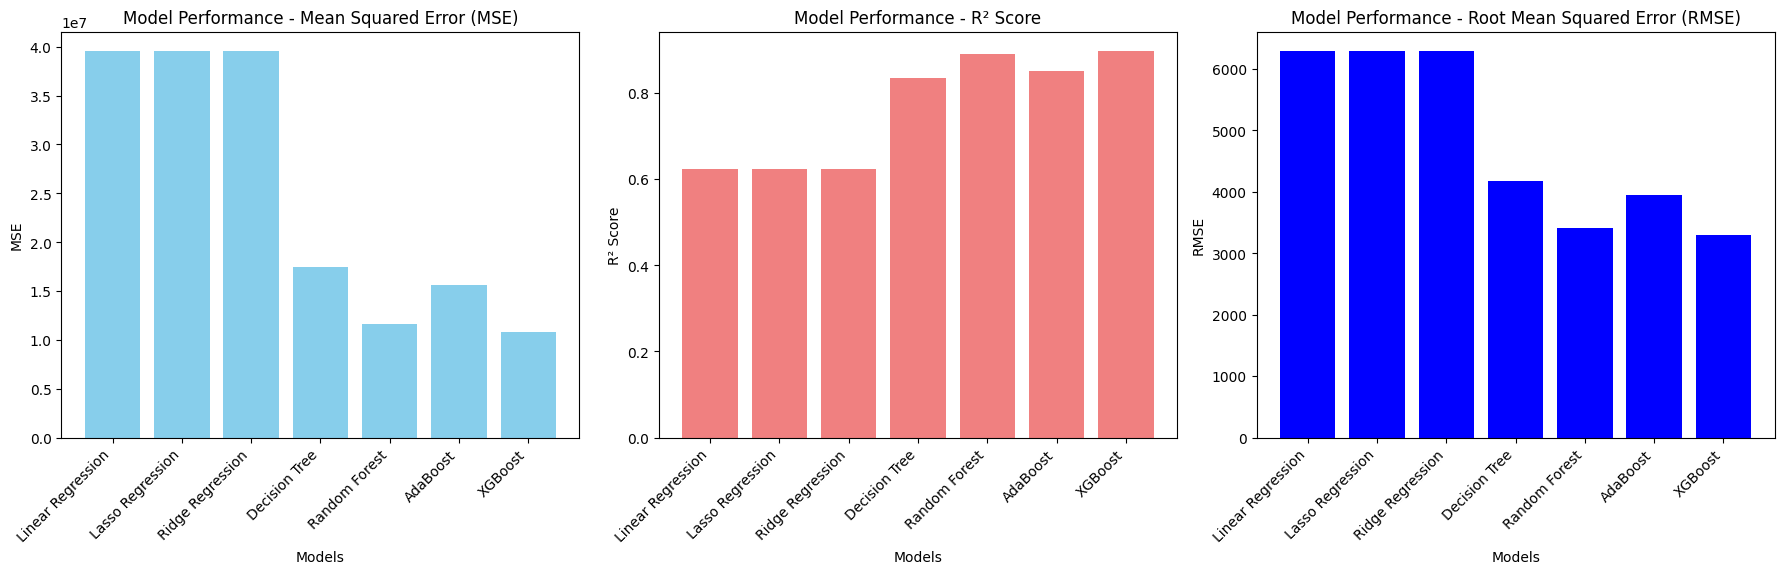

In [79]:
# Dictionary to store best models and their results
best_models = {}
results = {}

# Standardize features for models that need it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grids for each model
param_grids = {
    'Linear Regression': {
        'fit_intercept': [True, False],
    },
    'Lasso Regression': {
        'alpha': [0.001, 0.01, 0.1, 1, 10],
        'fit_intercept': [True, False],
    },
    'Ridge Regression': {
        'alpha': [0.001, 0.01, 0.1, 1, 10],
        'fit_intercept': [True, False],
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1],
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 5, 7],
    }
}

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Perform GridSearchCV for each model
for model_name, model in models.items():
    print(f"Tuning hyperparameters for {model_name}...")

    # For Linear, Ridge, and Lasso, use scaled data, for others use raw data
    if model_name in ['Linear Regression', 'Lasso Regression', 'Ridge Regression']:
        grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train, y_train)
    else:
        grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train, y_train)

    # Store the best model and its results
    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model

    # Make predictions
    if model_name in ['Linear Regression', 'Lasso Regression', 'Ridge Regression']:
        predictions = best_model.predict(X_test_scaled)
    else:
        predictions = best_model.predict(X_test)

    # Evaluate model performance
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    rmse = np.sqrt(mse)

    # Store results
    results[model_name] = {'MSE': mse, 'R2': r2, 'RMSE': rmse, 'Best Params': grid_search.best_params_}
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"{model_name} - MSE: {mse:.4f}, R²: {r2:.4f}, RMSE: {rmse:.4f}\n")

# Visualize the results using a bar plot
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Extracting values for plotting
model_names = list(results.keys())
mse_values = [metrics['MSE'] for metrics in results.values()]
r2_values = [metrics['R2'] for metrics in results.values()]
rmse_values = [metrics['RMSE'] for metrics in results.values()]

# Create a figure with subplots for MSE,RMSE and R²
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot MSE values
ax[0].bar(model_names, mse_values, color='skyblue')
ax[0].set_title('Model Performance - Mean Squared Error (MSE)')
ax[0].set_xlabel('Models')
ax[0].set_ylabel('MSE')
ax[0].set_xticklabels(model_names, rotation=45, ha='right')

# Plot R² values
ax[1].bar(model_names, r2_values, color='lightcoral')
ax[1].set_title('Model Performance - R² Score')
ax[1].set_xlabel('Models')
ax[1].set_ylabel('R² Score')
ax[1].set_xticklabels(model_names, rotation=45, ha='right')

# Plot RMSE values
ax[2].bar(model_names, rmse_values, color='blue')
ax[2].set_title('Model Performance - Root Mean Squared Error (RMSE)')
ax[2].set_xlabel('Models')
ax[2].set_ylabel('RMSE')
ax[2].set_xticklabels(model_names, rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Based on the provided plots showing Mean Squared Error (MSE), R² Score, and Root Mean Squared Error (RMSE) for various regression models
# (Linear Regression, Lasso Regression, Ridge Regression, Decision Tree, Random Forest, AdaBoost, and XGBoost) applied to the solar power generation dataset,
# here are the insights and observations:

# 1. Mean Squared Error (MSE) Comparison:
# Linear Regression, Lasso Regression, and Ridge Regression have the highest MSE values, approximately 4 x 10⁷, which suggests they do not perform well on this dataset.
# Decision Tree shows a significantly lower MSE than linear models, indicating better performance.
# Random Forest has the lowest MSE, indicating it performs the best in terms of minimizing the error.
# AdaBoost and XGBoost also show relatively low MSE, but XGBoost performs slightly better than AdaBoost.

# 2. R² Score Comparison:
# Random Forest, AdaBoost, and XGBoost have the highest R² scores, all around 0.8 or above, meaning these models explain a high proportion of the variance in the target variable.
# They are the most accurate models in this set.
# Decision Tree follows with an R² score slightly lower than the ensemble methods, still showing decent performance.
# Linear, Lasso, and Ridge Regressions show relatively low R² scores (~0.6), indicating that they explain less of the variance compared to decision trees and ensemble methods.

# 3. Root Mean Squared Error (RMSE) Comparison:
# Similar to the MSE plot, Linear, Lasso, and Ridge Regressions show the highest RMSE values, indicating they have larger errors compared to other models.
# Random Forest has the lowest RMSE, closely followed by XGBoost, which further confirms that these models perform better.
# AdaBoost shows an intermediate RMSE, suggesting it's a strong model but not as robust as Random Forest or XGBoost.

# Overall Observations:

# Linear Models (Linear, Lasso, Ridge Regression) struggle with this dataset, showing poor performance across all metrics (high MSE, high RMSE, and low R²).
# These models may be underfitting the data due to their simplicity.
# Decision Tree performs better than linear models, but still lags behind ensemble methods in terms of overall accuracy.
# Random Forest consistently outperforms all other models in terms of MSE, RMSE, and R², suggesting that it captures the data's complexity better.
# XGBoost and AdaBoost are also strong contenders, with XGBoost slightly outperforming AdaBoost, especially in terms of MSE and RMSE.

# Key Takeaway:

# Random Forest and XGBoost are the best performing models for this solar energy dataset.
# They should be prioritized when optimizing for both low error (MSE, RMSE) and high predictive power (R² score).
# Linear models should likely be avoided for this specific dataset due to their consistently poor performance across all evaluation metrics.

# Final conclusion:
# XGBoost is the best performing model for this dataset